<a href="https://colab.research.google.com/github/StuBelle/study/blob/main/HMM_%3D_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==在 Colab / Linux 環境安裝 Noto CJK 字體，讓 Matplotlib 可以顯示中文==
!apt-get -qy install fonts-noto-cjk  # 變數說明：apt-get -qy = 靜默模式安裝 fonts-noto-cjk 套件（包含 CJK 字型）
# todo：若不是 Colab 或沒有 sudo 權限，需改用本機字體安裝方式


# ==載入 Matplotlib 核心模組與常用繪圖、字體管理工具==
import matplotlib as mpl  # 變數說明：mpl = Matplotlib 主模組（可用來操作設定與底層行為）
# todo：若後續沒有使用 mpl，可移除避免未使用 import

import matplotlib.pyplot as plt  # 變數說明：plt = Matplotlib 繪圖介面（用 rcParams 設定全域字體）
# todo：若只設定 rcParams 而不畫圖，仍保留 plt 是合理的

import matplotlib.font_manager as fm  # 變數說明：fm = 字體管理工具（可用來查詢系統字體）
# todo：若沒有用到 fm 查詢字體清單，可移除避免未使用 import


# ==清除 Matplotlib 字體快取，強制重新掃描系統新安裝的字體（這一步最關鍵）==
!rm -rf ~/.cache/matplotlib  # 變數說明：刪除 Matplotlib 快取資料夾，避免舊字體列表導致找不到新字體
# todo：如果在非 Linux 環境（例如 Windows），需改用對應快取路徑


# ==設定 Matplotlib 全域預設字體為 Noto Sans CJK JP，讓圖表支援中文顯示==
plt.rcParams['font.family'] = 'Noto Sans CJK JP'  # 變數說明：font.family 指定全域字體家族為 Noto Sans CJK JP（支援 CJK）
# todo：若字體名稱不一致，可用 fm.findSystemFonts() 找到實際字體名稱

plt.rcParams['axes.unicode_minus'] = False  # 變數說明：避免負號顯示成方塊（unicode minus 與某些字體不相容）
# todo：如果仍出現方塊，可改用其他 Noto CJK 字體（例如 Noto Sans CJK TC）


# ==輸出提示訊息，確認字體設定流程已執行==
print("字體設定完成！")  # 變數說明：輸出字串，作為執行成功的提示
# todo：可加上字體檢查，例如 print(plt.rcParams['font.family']) 以確認設定值


Reading package lists...
Building dependency tree...
Reading state information...
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 2 not upgraded.
Need to get 61.2 MB of archives.
After this operation, 93.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1 [61.2 MB]
Fetched 61.2 MB in 4s (15.4 MB/s)
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 117540 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
字體設定完成！


# 資料

In [ ]:
# Google drive掛載
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path

# ==自動判斷執行環境（Colab vs 本機 Windows），並設定波動資料 parquet 資料夾路徑==
colab_vol_dir = Path(r"/content/drive/MyDrive/實驗資料/秒_資料/波動/parquet")  # 變數說明：colab_vol_dir = Colab Google Drive 的 parquet 資料來源路徑
# todo：若 Drive 尚未 mount，colab_vol_dir.exists() 會是 False

local_vol_dir = Path(r"G:\OneDrive - National Pingtung University\code\data\秒_資料\波動\parquet")  # 變數說明：local_vol_dir = 本機 Windows 的 parquet 資料來源路徑
# todo：若本機路徑可能變動，可改成讀取設定檔或環境變數

if colab_vol_dir.exists():  # 變數說明：exists() = 檢查該路徑是否實際存在（用來判斷是否在 Colab 且 Drive 可用）
    # ==優先使用 Colab Drive 路徑（最常見於雲端執行）==
    path_vol_dir = colab_vol_dir  # 變數說明：path_vol_dir = 最終使用的 parquet 來源資料夾（指向 Colab 版本）
    # todo：可在此加上提示訊息 print("使用 Colab Drive 路徑")

elif local_vol_dir.exists():  # 變數說明：若 Colab 路徑不存在，則檢查本機 Windows 路徑是否存在
    # ==若在本機執行，則使用 Windows OneDrive 路徑==
    path_vol_dir = local_vol_dir  # 變數說明：path_vol_dir = 最終使用的 parquet 來源資料夾（指向本機版本）
    # todo：可在此加上提示訊息 print("使用本機 Windows 路徑")

else:
    # ==若兩個路徑都不存在，直接拋出錯誤，避免後續讀檔才爆炸==
    raise FileNotFoundError(  # 變數說明：FileNotFoundError = 明確指出資料路徑不存在的例外
        f"找不到波動資料路徑，請確認以下任一資料夾存在：\n"
        f"1) {colab_vol_dir}\n"
        f"2) {local_vol_dir}"
    )

# ===設定輸出資料夾（存放模型結果、圖表、parquet 等輸出）===
OUT = Path("./output_v全域版")  # =
# ===建立輸出資料夾，若已存在則不報錯，並且自動建立父層資料夾===
OUT.mkdir(exist_ok=True, parents=True)
# todo：可加上 print(OUT.resolve()) 確認實際輸出路徑，避免寫到非預期位置


In [ ]:
# ==Cell 1: 參數設定 + 工具函數==
import warnings  # 變數說明：Python 警告控制模組
# warnings.filterwarnings("ignore")  # 變數說明：ignore = 關閉所有 warnings（避免 notebook 輸出太吵）
warnings.filterwarnings("ignore", category=FutureWarning)

import gc  # 變數說明：gc = 垃圾回收模組
from datetime import date, datetime  # 變數說明：date/datetime = 日期處理（解析檔名與 log 時間）

import numpy as np
import polars as pl
from sklearn.decomposition import FastICA  # 變數說明：FastICA = ICA 模型（萃取情緒因子）


# ==全域參數設定==
FREQ = "1m"  # 變數說明：FREQ = 聚合頻率（每 1 分鐘 resample 一根）
WINDOW_R = 5  # 變數說明：WINDOW_R = 價格特徵 rolling window（報酬移動統計用）
WINDOW_E = 15  # 變數說明：WINDOW_E = 情緒特徵 rolling window（std 等）
EPSILON = 1e-6  # 變數說明：EPSILON = 防止 log(0) 的極小值


# ==清洗設定==
MIN_VOL_THRESHOLD = 5.0  # 變數說明：MIN_VOL_THRESHOLD = 總量過低視為死魚盤，直接濾掉
MAX_RET_THRESHOLD = 0.1  # 變數說明：MAX_RET_THRESHOLD = 單分鐘報酬超過此值視為異常，直接濾掉


# ==ICA 設定==
ICA_COMPONENTS = 1  # 變數說明：ICA_COMPONENTS = ICA 輸出維度（你目前只取 1 個情緒因子）
ICA_WINDOW_SIZE = 5  # 變數說明：ICA_WINDOW_SIZE = ICA 滾動訓練窗口（過去 5 個交易日）


# ==Logging 工具==
def log(msg):
    print(f"[{datetime.now().strftime('%H:%M:%S')}] 🔹 {msg}")


# ==日期解析工具：判斷近月/遠月標籤==
def get_short_long_labels(fdate):  # 變數說明：fdate = date 物件（交易日）
    """判斷週三與週五結算日的標籤映射"""  # 變數說明：回傳 ("Wed","Fri") 或 ("Fri","Wed")
    wd = fdate.weekday()  # 變數說明：wd = weekday (0=Mon ... 6=Sun)

    if wd in (0, 1):  # 變數說明：週一/週二：近月 Wed、遠月 Fri
        return ("Wed", "Fri")  # 變數說明：return = (short, long)

    if wd in (2, 3):  # 變數說明：週三/週四：週三換倉後近月 Fri、遠月 Wed
        return ("Fri", "Wed")  # 變數說明：return = (short, long)

    if wd == 4:  # 變數說明：週五：近月 Fri、遠月 Wed
        return ("Fri", "Wed")  # 變數說明：return = (short, long)

    raise ValueError(f"非交易日或無法判斷: {fdate} (weekday={wd})")  # 變數說明：週末或不合法日期直接報錯


# ==日期解析工具：從檔名解析交易日==
def parse_date(stem):  # 變數說明：stem = Path(fp).stem（不含副檔名的檔名）
    """
    從檔名解析日期
    修正邏輯：針對 MMDD 格式，若月份 < 9，自動視為 2026 年，否則為 2025 年。
    """  # 變數說明：支援 YYYY-MM-DD / YYYYMMDD / MMDD 三種格式

    try:
        return datetime.strptime(stem, "%Y-%m-%d").date()  # 變數說明：先嘗試直接解析 YYYY-MM-DD
    except ValueError:  # 變數說明：只捕捉日期格式錯誤，不吞掉其他 bug
        pass  # 變數說明：若解析失敗，繼續往下走

    digits = "".join([c for c in stem if c.isdigit()])  # 變數說明：digits = 抽出檔名中所有數字（備用解析用）

    if len(digits) == 8:  # 變數說明：YYYYMMDD
        return date(int(digits[:4]), int(digits[4:6]), int(digits[6:]))  # 變數說明：切片解析年月日

    if len(digits) == 4:  # 變數說明：MMDD（需要判斷年份）
        month = int(digits[:2])  # 變數說明：month = 月份
        day = int(digits[2:])  # 變數說明：day = 日期

        year = 2026 if month < 9 else 2025  # 變數說明：跨年規則：1~8月視為 2026，9~12月視為 2025
        # todo：若資料延伸到 2027，這個規則就要再改成更通用的

        return date(year, month, day)  # 變數說明：回傳 date(year, month, day)

    return None  # 變數說明：解析不到日期就回傳 None（讓上層跳過該檔案）
    # todo：若你希望強制每個檔案都要可解析，可改成 raise


# ==Polars 數值處理工具：安全計算 log return==
def safe_log_diff(col_name):  # 變數說明：col_name = 欄位名稱（例如 Price / Wed_Call）
    """計算 Log Return，並處理 Log(0) 與 Inf 問題"""  # 變數說明：回傳 Polars expression
    return (
        pl.when(pl.col(col_name) <= EPSILON)  # 變數說明：若數值 <= EPSILON（避免 log(0)）
        .then(EPSILON)  # 變數說明：替換成 EPSILON
        .otherwise(pl.col(col_name))  # 變數說明：否則保留原值
        .log()  # 變數說明：取自然對數
        .diff()  # 變數說明：做一階差分 = log return
        .fill_nan(0.0)  # 變數說明：nan 補 0
        .fill_null(0.0)  # 變數說明：null 補 0
    )
    # todo：若你希望保留缺失訊號，可改成不補 0，而是補 null


# ==單日處理函數：讀取並聚合 1 天 parquet==
def process_single_day(fp):  # 變數說明：fp = parquet 檔案 Path
    """讀取並處理單日 Parquet 檔案"""  # 變數說明：輸出 Polars DataFrame 或 None
    try:
        fdate = parse_date(fp.stem)  # 變數說明：fdate = 從檔名解析出的交易日期
        if fdate is None:  # 變數說明：若檔名無法解析日期
            return None  # 變數說明：跳過該檔案
            # todo：可加 log 提醒哪些檔名解析不到日期

        df_vol = pl.read_parquet(fp)  # 變數說明：df_vol = 單日原始秒資料（含波動與成交量）
        # todo：若檔案很大，可改成 scan_parquet + lazy pipeline

        if "時間" in df_vol.columns:  # 變數說明：處理中文欄位名稱
            df_vol = df_vol.rename({"時間": "SnapshotTime"})  # 變數說明：統一時間欄位為 SnapshotTime
            # todo：若你還有其他中文欄位，也可以統一 rename

        # ==檢查必要欄位是否存在==
        required_cols = [  # 變數說明：required_cols = 必要欄位清單
            "SnapshotTime",  # 變數說明：時間欄位
            "現貨",  # 變數說明：現貨價格
            "Wed_Call波動",  # 變數說明：週三 Call 波動
            "Wed_Put波動",  # 變數說明：週三 Put 波動
            "Fri_Call波動",  # 變數說明：週五 Call 波動
            "Fri_Put波動",  # 變數說明：週五 Put 波動
            "權值股_總瞬間量",  # 變數說明：總量
            "權值股_買進",  # 變數說明：買進金額
            "權值股_賣出",  # 變數說明：賣出金額
        ]


        if not all(col in df_vol.columns for col in required_cols):  # 檢查 required_cols 是否都存在
            return None  # 欄位不完整則跳過


        # ==聚合為 1 分鐘 K 棒（Resample）==
        q = (  # 變數說明：q = LazyFrame pipeline（提高效能）
            df_vol.lazy()  # 變數說明：lazy = 延遲執行
            .group_by_dynamic("SnapshotTime", every=FREQ)  # 變數說明：每 FREQ 分鐘聚合
            .agg([  # 變數說明：聚合規則
                pl.col("現貨").last().alias("Price"),  # 變數說明：Price = 每分鐘最後一筆現貨價格
                pl.col("Wed_Call波動").last().alias("Wed_Call"),  # 變數說明：Wed_Call = 每分鐘最後一筆週三 Call 波動
                pl.col("Wed_Put波動").last().alias("Wed_Put"),  # 變數說明：Wed_Put = 每分鐘最後一筆週三 Put 波動
                pl.col("Fri_Call波動").last().alias("Fri_Call"),  # 變數說明：Fri_Call = 每分鐘最後一筆週五 Call 波動
                pl.col("Fri_Put波動").last().alias("Fri_Put"),  # 變數說明：Fri_Put = 每分鐘最後一筆週五 Put 波動
                pl.col("權值股_總瞬間量").sum().alias("Vol_Total"),  # 變數說明：Vol_Total = 每分鐘權值股總量
                pl.col("權值股_買進").sum().alias("Vol_Buy"),  # 變數說明：Vol_Buy = 每分鐘買進量金額
                pl.col("權值股_賣出").sum().alias("Vol_Sell"),  # 變數說明：Vol_Sell = 每分鐘賣出量金額
            ])
            .filter(  #只保留交易時間
                (pl.col("SnapshotTime").dt.time() >= pl.time(8, 45))  # 起始 08:45
                & (pl.col("SnapshotTime").dt.time() <= pl.time(13, 45))  # 結束 13:45
            )
        )

        df_agg = q.collect()  # 變數說明：collect = 實際執行 lazy pipeline 得到 DataFrame
        if df_agg.is_empty():  # 若當天沒有有效資料
            return None  # 跳過
            # todo：可加 log 看哪些日期沒資料

        # ==取得期權標籤（近月/遠月）==
        try:
            short, long = get_short_long_labels(fdate)  # 變數說明：short/long = ("Wed","Fri") 或 ("Fri","Wed")
        except ValueError:
            return None  # 非交易日則跳過
            # todo：若你想保留非交易日資料，可改成 fallback

        def vc(day, cp):  # 變數說明：day = Wed/Fri, cp = Call/Put
            return f"{day}_{cp}"  # 回傳欄位名稱（對應後面要用的欄位）
            # todo：若你未來加入更多合約，可改成 dict mapping

        # ==計算報酬與波動情緒差分==
        df_agg = df_agg.with_columns([  # 變數說明：新增特徵欄位
            safe_log_diff("Price").alias("Ret_t"),  # Ret_t = 現貨 log return
            safe_log_diff(vc(short, "Call")).alias("Emo_Short_Call_diff"),  # 近月 Call 波動 log diff
            safe_log_diff(vc(short, "Put")).alias("Emo_Short_Put_diff"),  # 近月 Put 波動 log diff
            safe_log_diff(vc(long, "Call")).alias("Emo_Long_Call_diff"),  # 遠月 Call 波動 log diff
            safe_log_diff(vc(long, "Put")).alias("Emo_Long_Put_diff"),  # 遠月 Put 波動 log diff
            pl.lit(fdate).alias("date_group"),  # date_group = 交易日分組欄位
        ])
        # todo：若你想要 session-based 特徵，可以加上分鐘索引欄位

        keep_cols = [  # 最終保留欄位
            "SnapshotTime", "date_group", "Price",
            "Vol_Total", "Vol_Buy", "Vol_Sell",
            "Ret_t",
            "Emo_Short_Call_diff", "Emo_Short_Put_diff",
            "Emo_Long_Call_diff", "Emo_Long_Put_diff",
        ]

        return df_agg.select([c for c in keep_cols if c in df_agg.columns])  # 變數說明：回傳整理後的單日 DataFrame


    except Exception as e:  # 捕捉所有錯誤避免整批處理中斷
        log(f"處理檔案 {fp.name} 時發生錯誤: {e}")  # 變數說明：輸出錯誤訊息
        return None  # 出錯則跳過該檔案
        # todo：可把錯誤檔案名寫入 log 檔方便回溯


# ==Cell 2: 特徵工程函數==
def perform_feature_engineering(df):  # 合併後的全資料（多日）
    """
    分階段構建特徵工程：
    1️⃣ 資金動向 (Buy_pressure_t)
    2️⃣ 滾動 ICA 情緒因子
    3️⃣ 價格特徵
    """
    log("開始執行特徵工程...")

    # ==1️⃣ 資金動向==
    log("執行 1️⃣ 資金動向特徵...")

    df = df.sort(["date_group", "SnapshotTime"])  # 確保每個交易日內時間排序
    df = df.filter(  #清洗條件（死魚盤 + 異常波動）
        (pl.col("Vol_Total") >= MIN_VOL_THRESHOLD)  # 總量必須 >= MIN_VOL_THRESHOLD
        & (pl.col("Ret_t").abs() <= MAX_RET_THRESHOLD)  # 報酬絕對值 <= MAX_RET_THRESHOLD
    )


    df = df.with_columns([  # 新增 Buy_pressure_t
        (
            (pl.col("Vol_Buy") - pl.col("Vol_Sell"))  # 買賣差
            / (pl.col("Vol_Buy") + pl.col("Vol_Sell") + 1)  # 分母加 1 避免除以 0
        ).alias("Buy_pressure_t")  # Buy_pressure_t = 資金動向（-1~1）
    ])

    df = df.with_columns([  # 雙重平滑（代表更長期意圖）
        pl.col("Buy_pressure_t")  # 原始買壓指標
        .ewm_mean(span=30, adjust=False)  # 第一次 EWM 平滑（30m）
        .alias("Buy_pressure_trend_30m"),  # 變數說明：Buy_pressure_trend_30m = 長期買壓趨勢（30m）

        pl.col("Buy_pressure_t")  # 原始買壓指標
        .ewm_mean(span=60, adjust=False)  # 第一次 EWM 平滑（60m）
        .alias("Buy_pressure_trend_60m"),  # Buy_pressure_trend_60m = 更長期買壓趨勢（60m）
    ])


    # ==2️⃣ 滾動 ICA 情緒因子==
    log("執行 2️⃣ 滾動 ICA（情緒因子萃取）")

    emo_cols = [  # 變數說明：emo_cols = ICA 的輸入欄位（四個波動差分）
        "Emo_Short_Call_diff",
        "Emo_Short_Put_diff",
        "Emo_Long_Call_diff",
        "Emo_Long_Put_diff",
    ]

    unique_dates = sorted(df["date_group"].unique().to_list())  # 變數說明：unique_dates = 交易日清單（排序後）
    df = df.with_columns(pl.lit(0.0).alias("Emo_score"))  # 變數說明：先建立預設 Emo_score（避免 ICA 失敗時缺欄）
    # todo：如果你想追蹤 ICA 失敗比例，可加一個 Emo_valid flag

    results = []  # 變數說明：results = 每日計算後的 DataFrame list（最後 concat）
    # todo：若資料天數很大，list 會吃記憶體，可改成分批寫出

    for i, d in enumerate(unique_dates):  # 變數說明：i = 日期索引，d = 當前交易日
        train_dates = unique_dates[max(0, i - ICA_WINDOW_SIZE): i + 1]  # 變數說明：訓練日期範圍（過去 N 天 + 當天）
        # todo：若你想避免 look-ahead bias，應該排除當天（只用過去天）

        df_train = df.filter(pl.col("date_group").is_in(train_dates))  # 變數說明：df_train = ICA 訓練資料
        df_cur = df.filter(pl.col("date_group") == d)  # 變數說明：df_cur = 當日資料（要 transform）

        X_train = df_train.select(emo_cols).fill_null(0).fill_nan(0).to_numpy()  # 變數說明：X_train = ICA 訓練矩陣
        X_cur = df_cur.select(emo_cols).fill_null(0).fill_nan(0).to_numpy()  # 變數說明：X_cur = 當日矩陣

        if X_train.shape[0] > 50:  # 變數說明：避免樣本太少導致 ICA 不穩
            try:
                ica = FastICA(  # 變數說明：建立 ICA 模型
                    n_components=ICA_COMPONENTS,  # 變數說明：輸出維度（1）
                    random_state=42,  # 變數說明：固定隨機種子（確保可重現）
                    max_iter=1000,  # 變數說明：最大迭代次數（避免不收斂）
                )
                # todo：若常出現 ConvergenceWarning，可調整 tol 或 whiten 參數

                ica.fit(X_train)  # 變數說明：用過去窗口資料 fit ICA
                emo = ica.transform(X_cur).ravel()  # 變數說明：emo = 當日每分鐘的 ICA 1D 分數

                ret_arr = df_cur["Ret_t"].to_numpy()  # 變數說明：ret_arr = 當日報酬率，用來做方向校準

                if len(emo) > 1 and not np.all(np.isnan(ret_arr)):  # 變數說明：確保可計算 corr
                    corr = np.corrcoef(emo, ret_arr)[0, 1]  # 變數說明：corr = 情緒分數與報酬率的相關係數
                    # todo：若你想更穩健，可改 Spearman 或 rolling corr

                    if not np.isnan(corr) and corr < 0:  # 變數說明：若相關性為負
                        emo = -emo  # 變數說明：翻轉方向，讓 Emo_score 越大越偏多

                df_cur = df_cur.with_columns(pl.Series("Emo_score", emo))  # 變數說明：把 emo 寫回當日 DataFrame

            except Exception as e:  # 變數說明：ICA 可能因矩陣問題或收斂失敗
                log(f"  ⚠️  日期 {d} ICA 計算失敗，保留預設值：{e}")  # 變數說明：顯示警告
                # todo：可把失敗日期記錄到 list，最後輸出

        results.append(df_cur)  # 變數說明：把當日結果加入 results

    df = pl.concat(results)  # 變數說明：把每日結果合併回完整資料
    # todo：若結果順序錯亂，可再 sort 一次 date_group + SnapshotTime


    # ==情緒次級特徵==
    df = df.with_columns([  # 變數說明：從 Emo_score 延伸更多特徵
        pl.col("Emo_score").diff().fill_null(0).alias("Emo_score_delta"),  # 變數說明：情緒變化量
        pl.col("Emo_score").rolling_std(WINDOW_E, min_periods=1).alias("Emo_score_15std"),  # 變數說明：情緒波動度
        pl.col("Emo_score").shift(1).alias("Emo_score_lag1"),  # 變數說明：前一分鐘情緒
    ])
    # todo：若你要做 HMM，lag1 和 delta 通常很有用


    # ==3️⃣ 價格特徵==
    log("執行 3️⃣ 價格特徵...")  # 變數說明：提示目前階段

    df = df.with_columns([  # 變數說明：價格/報酬延伸特徵
        pl.col("Ret_t").rolling_mean(WINDOW_R, min_periods=1).alias("Ret_ma_5m"),  # 變數說明：5 分鐘平均報酬
        pl.col("Ret_t").rolling_std(WINDOW_R, min_periods=1).alias("Ret_std_5m"),  # 變數說明：5 分鐘報酬波動度
        pl.col("Ret_t").shift(1).fill_null(0).alias("Ret_lag1"),  # 變數說明：前一分鐘報酬
    ])
    # todo：若你要做 regime 模型，可再加 rolling sum 或 zscore

    gc.collect()  # 變數說明：強制垃圾回收，釋放 ICA 訓練中產生的中間物件
    # todo：gc.collect() 不一定需要，但在 Colab 大資料通常有幫助

    log("✔ 核心變數建構完成（無雜訊指標）")  # 變數說明：提示完成
    return df  # 變數說明：回傳最終特徵資料


# ==Cell 3: 資料讀取 + 特徵工程執行==
if __name__ == "__main__":  # 變數說明：只在 script 執行時跑（notebook 可直接跑也會成立）
    log(f"資料來源路徑：{path_vol_dir}")  # 變數說明：輸出目前讀取的資料夾路徑

    if not path_vol_dir.exists():  # 變數說明：檢查資料來源路徑是否存在
        log("❌ 路徑不存在，請修改 path_vol_dir")  # 變數說明：輸出錯誤提示
        raise FileNotFoundError(path_vol_dir)  # 變數說明：直接中止，避免後續全空
        # todo：若你希望 notebook 不中斷，可改成 return

    log("=" * 60)  # 變數說明：輸出分隔線
    log("【步驟 1】讀取原始資料...")  # 變數說明：提示目前步驟
    log("=" * 60)  # 變數說明：輸出分隔線

    files = sorted(path_vol_dir.glob("*.parquet"))  # 變數說明：files = parquet 檔案列表（排序）
    log(f"✔ 發現 {len(files)} 個檔案，準備處理...")  # 變數說明：輸出檔案數量

    if len(files) == 0:  # 變數說明：如果資料夾內沒有 parquet
        log("❌ 錯誤：資料夾內沒有任何 parquet 檔案")  # 變數說明：輸出錯誤提示
        raise FileNotFoundError(f"找不到 parquet: {path_vol_dir}")  # 變數說明：中止流程
        # todo：若你有其他副檔名，可擴充 glob

    df_list = []  # 變數說明：df_list = 儲存每日 DataFrame 的 list（最後 concat）

    for i, fp in enumerate(files):  # 變數說明：i = index, fp = parquet 檔案 Path
        df_day = process_single_day(fp)  # 變數說明：df_day = 單日處理結果（或 None）

        if df_day is not None:  # 變數說明：只保留成功處理的資料
            cols_to_cast = [  # 變數說明：cols_to_cast = 要轉 float 的欄位（排除日期與時間）
                c for c in df_day.columns
                if c not in ["date_group", "SnapshotTime"]
            ]
            # todo：若你想節省記憶體，可用 Float32

            df_day = df_day.with_columns([  # 變數說明：把數值欄位統一轉成 Float64
                pl.col(c).cast(pl.Float64) for c in cols_to_cast  # 變數說明：逐欄位 cast
            ])

            df_list.append(df_day)  # 變數說明：加入 list 等待後續 concat

        if (i + 1) % 50 == 0:  # 變數說明：每 50 個檔案輸出一次進度
            log(f"  已處理 {i + 1}/{len(files)} 個檔案...")  # 變數說明：進度提示

    log("=" * 60)  # 變數說明：輸出分隔線
    log("【步驟 2】合併資料...")  # 變數說明：提示目前步驟
    log("=" * 60)  # 變數說明：輸出分隔線

    if df_list:  # 變數說明：若有至少一個成功日資料
        df_all = pl.concat(df_list, how="vertical_relaxed")  # 變數說明：df_all = 合併後完整資料
        del df_list  # 變數說明：刪除 list 釋放記憶體
        gc.collect()  # 變數說明：強制垃圾回收

        log(f"✔ 合併後原始筆數：{df_all.height:,}")  # 變數說明：顯示合併後筆數
        log(f"✔ 時間範圍：{df_all['SnapshotTime'].min()} ~ {df_all['SnapshotTime'].max()}")  # 變數說明：顯示時間範圍
        log(f"✔ 交易日期數：{df_all['date_group'].n_unique()}")  # 變數說明：顯示交易日數

        log("=" * 60)  # 變數說明：輸出分隔線
        log("【步驟 3】執行特徵工程...")  # 變數說明：提示目前步驟
        log("=" * 60)  # 變數說明：輸出分隔線

        df_final = perform_feature_engineering(df_all)  # 變數說明：df_final = 最終特徵資料

        log(f"✔ 清洗與處理後最終筆數：{df_final.height:,}")  # 變數說明：顯示最終筆數

        log("=" * 60)  # 變數說明：輸出分隔線
        log("【步驟 4】資料檢查...")  # 變數說明：提示目前步驟
        log("=" * 60)  # 變數說明：輸出分隔線

        log(f"✔ 最終欄位數：{len(df_final.columns)}")  # 變數說明：顯示欄位數
        log(f"✔ 欄位列表：{df_final.columns}")  # 變數說明：顯示欄位名稱清單

        missing_counts = df_final.null_count()  # 變數說明：missing_counts = 每欄位 null 數量統計
        total_nulls = missing_counts.sum_horizontal()[0]  # 變數說明：total_nulls = 全欄位 null 總和

        if total_nulls > 0:  # 變數說明：若存在缺失值
            log("⚠️  發現缺失值：")  # 變數說明：輸出警告
            missing_dict = missing_counts.to_dict(as_series=False)  # 變數說明：轉成 dict 方便逐欄位印出

            for col, count in missing_dict.items():  # 變數說明：逐欄位檢查缺失數
                if count[0] > 0:  # 變數說明：若該欄位缺失 > 0
                    log(f"    - {col}: {count[0]} 筆")  # 變數說明：輸出欄位缺失數
        else:
            log("✔ 無缺失值")  # 變數說明：確認資料完整

        log("=" * 60)  # 變數說明：輸出分隔線
        log("【步驟 5】輸出結果...")  # 變數說明：提示目前步驟
        log("=" * 60)  # 變數說明：輸出分隔線

        out_file = OUT / "step1_features_optimized.parquet"  # 變數說明：out_file = 輸出 parquet 檔案路徑
        df_final.write_parquet(out_file)  # 變數說明：把 df_final 寫成 parquet
        log(f"✅ 檔案已輸出至：{out_file}")  # 變數說明：輸出檔案位置

        log("\n【資料統計摘要】")  # 變數說明：輸出摘要標題
        log(f"  - 總筆數：{df_final.height:,}")  # 變數說明：顯示總筆數
        log(f"  - 交易日數：{df_final['date_group'].n_unique()}")  # 變數說明：顯示交易日數
        log(f"  - 時間跨度：{df_final['SnapshotTime'].min()} ~ {df_final['SnapshotTime'].max()}")  # 變數說明：顯示時間跨度

        numeric_cols = [c for c in df_final.columns if c not in ["date_group", "SnapshotTime"]]  # 變數說明：numeric_cols = 數值欄位清單
        stats = df_final.select(numeric_cols).describe()  # 變數說明：stats = Polars describe 統計表

        log("\n【關鍵欄位統計】")  # 變數說明：輸出標題
        print(stats)  # 變數說明：顯示 describe 結果（包含 mean/std/min/max）

    else:
        log("❌ 錯誤：未讀取到任何有效資料。")  # 變數說明：若 df_list 為空
        log("   請檢查：")  # 變數說明：提示排查方向
        log("   1. 資料路徑是否正確")  # 變數說明：排查項目 1
        log("   2. Parquet 檔案是否損毀")  # 變數說明：排查項目 2
        log("   3. 必要欄位是否存在")  # 變數說明：排查項目 3
        # todo：可加上統計：成功處理檔案數 / 跳過檔案數


[02:14:07] 🔹 資料來源路徑：/content/drive/MyDrive/實驗資料/秒_資料/波動/parquet
[02:14:07] 🔹 ============================================================
[02:14:07] 🔹 【步驟 1】讀取原始資料...
[02:14:07] 🔹 ============================================================
[02:14:07] 🔹 ✔ 發現 86 個檔案，準備處理...
[02:15:13] 🔹   已處理 50/86 個檔案...
[02:16:02] 🔹 ============================================================
[02:16:02] 🔹 【步驟 2】合併資料...
[02:16:02] 🔹 ============================================================
[02:16:03] 🔹 ✔ 合併後原始筆數：24,347
[02:16:03] 🔹 ✔ 時間範圍：2025-09-05 08:45:00 ~ 2026-01-21 13:45:00
[02:16:03] 🔹 ✔ 交易日期數：86
[02:16:03] 🔹 ============================================================
[02:16:03] 🔹 【步驟 3】執行特徵工程...
[02:16:03] 🔹 ============================================================
[02:16:03] 🔹 開始執行特徵工程...
[02:16:03] 🔹 執行 1️⃣ 資金動向特徵...
[02:16:03] 🔹 執行 2️⃣ 滾動 ICA（情緒因子萃取）
[02:16:03] 🔹 執行 3️⃣ 價格特徵...
[02:16:03] 🔹 ✔ 核心變數建構完成（無雜訊指標）
[02:16:03] 🔹 ✔ 清洗與處理後最終筆數：20,606
[02:16:03] 🔹 ===============================

/tmp/ipython-input-998437838.py:297: DeprecationWarning: the argument `min_periods` for `Expr.rolling_std` is deprecated. It was renamed to `min_samples` in version 1.21.0.
  pl.col("Emo_score").rolling_std(WINDOW_E, min_periods=1).alias("Emo_score_15std"),  # 變數說明：情緒波動度
/tmp/ipython-input-998437838.py:307: DeprecationWarning: the argument `min_periods` for `Expr.rolling_mean` is deprecated. It was renamed to `min_samples` in version 1.21.0.
  pl.col("Ret_t").rolling_mean(WINDOW_R, min_periods=1).alias("Ret_ma_5m"),  # 變數說明：5 分鐘平均報酬
/tmp/ipython-input-998437838.py:308: DeprecationWarning: the argument `min_periods` for `Expr.rolling_std` is deprecated. It was renamed to `min_samples` in version 1.21.0.
  pl.col("Ret_t").rolling_std(WINDOW_R, min_periods=1).alias("Ret_std_5m"),  # 變數說明：5 分鐘報酬波動度


In [ ]:
# @title
# ============================================================
# Cell 4: 特徵標準化 (RobustScaler with 5-Day Rolling Window)
# ============================================================

from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings("ignore")

log("=" * 60)
log("【步驟 6】特徵標準化（RobustScaler with 5-Day Rolling Window）...")
log("=" * 60)

# 讀取之前輸出的特徵檔案
out_file = OUT / "step1_features_optimized.parquet"
df_final = pl.read_parquet(out_file)

# 定義需要標準化的欄位（排除時間和分組欄位）
exclude_cols = ["SnapshotTime", "date_group"]
feature_cols = [c for c in df_final.columns if c not in exclude_cols]

log(f"✔ 讀取特徵資料：{out_file}")
log(f"✔ 待標準化欄位數：{len(feature_cols)}")
log(f"✔ 欄位列表：{feature_cols}")

# 初始化標準化欄位
df_scaled = df_final.with_columns([
    pl.lit(None).cast(pl.Float64).alias(f"{c}_scaled")
    for c in feature_cols
])

# 取得所有唯一日期並排序
unique_dates = sorted(df_final["date_group"].unique().to_list())
log(f"✔ 總交易日數：{len(unique_dates)}")

# ==========================================================
# 執行滾動窗口標準化 (5-Day Rolling Window)
# ==========================================================
log("\n開始執行 5 日滾動窗口標準化...")

results = []
window_size = 5

for i, current_date in enumerate(unique_dates):
    # 構建訓練窗口：過去 5 天 + 當前日期
    train_start_idx = max(0, i - window_size + 1)
    train_dates = unique_dates[train_start_idx : i + 1]

    # 取得訓練資料（用於計算 scaler 的 median 和 IQR）
    df_train = df_final.filter(pl.col("date_group").is_in(train_dates))

    # 取得當前日期資料（待標準化）
    df_current = df_final.filter(pl.col("date_group") == current_date)

    # 提取特徵矩陣
    X_train = df_train.select(feature_cols).fill_null(0.0).to_numpy()
    X_current = df_current.select(feature_cols).fill_null(0.0).to_numpy()

    # 訓練 RobustScaler（基於訓練窗口）
    scaler = RobustScaler(quantile_range=(25.0, 75.0))
    scaler.fit(X_train)

    # 標準化當前日期數據
    X_scaled = scaler.transform(X_current)

    # 將標準化後的數據併回到當前日期 DataFrame
    df_current_scaled = df_current.clone()
    for j, col in enumerate(feature_cols):
        df_current_scaled = df_current_scaled.with_columns(
            pl.Series(f"{col}_scaled", X_scaled[:, j])
        )

    results.append(df_current_scaled)

    if (i + 1) % 10 == 0 or i == 0:
        log(f"  ✔ 已處理 {i + 1}/{len(unique_dates)} 天（訓練窗口：{len(train_dates)} 天）")

# 合併所有標準化結果
df_scaled_final = pl.concat(results)

log("\n✔ 滾動窗口標準化完成")

# ==========================================================
# 驗證標準化結果
# ==========================================================
log("\n" + "=" * 60)
log("【驗證標準化結果】")
log("=" * 60)

# 選擇幾個關鍵欄位進行驗證
check_cols = ["Price", "Ret_t", "Buy_pressure_t", "Emo_score"]
check_scaled_cols = [f"{c}_scaled" for c in check_cols]

log("\n原始特徵統計：")
stats_original = df_final.select(check_cols).describe()
print(stats_original)

log("\n標準化特徵統計：")
stats_scaled = df_scaled_final.select(check_scaled_cols).describe()
print(stats_scaled)

# ==========================================================
# 保留原始欄位 + 添加標準化欄位
# ==========================================================
log("\n" + "=" * 60)
log("【輸出最終資料集】")
log("=" * 60)

# 最終資料集：保留原始欄位 + 所有標準化欄位
scaled_feature_cols = [f"{c}_scaled" for c in feature_cols]
final_cols = exclude_cols + feature_cols + scaled_feature_cols

df_final_output = df_scaled_final.select(final_cols)

log(f"✔ 最終資料集欄位數：{len(df_final_output.columns)}")
log(f"✔ 原始欄位：{len(exclude_cols) + len(feature_cols)}")
log(f"✔ 標準化欄位：{len(scaled_feature_cols)}")
log(f"✔ 總筆數：{df_final_output.height:,}")

# 輸出檔案
out_scaled_file = OUT / "step2_features_scaled.parquet"
df_final_output.write_parquet(out_scaled_file)

log(f"\n✅ 標準化資料已輸出至：{out_scaled_file}")

# 輸出欄位列表
log("\n【最終欄位列表】")
log("原始 + 標準化欄位：")
for col in df_final_output.columns:
    log(f"  - {col}")

log("\n✔ 特徵標準化流程完成！")

[02:16:03] 🔹 ============================================================
[02:16:03] 🔹 【步驟 6】特徵標準化（RobustScaler with 5-Day Rolling Window）...
[02:16:03] 🔹 ============================================================
[02:16:03] 🔹 ✔ 讀取特徵資料：output_v全域版/step1_features_optimized.parquet
[02:16:03] 🔹 ✔ 待標準化欄位數：19
[02:16:03] 🔹 ✔ 欄位列表：['Price', 'Vol_Total', 'Vol_Buy', 'Vol_Sell', 'Ret_t', 'Emo_Short_Call_diff', 'Emo_Short_Put_diff', 'Emo_Long_Call_diff', 'Emo_Long_Put_diff', 'Buy_pressure_t', 'Buy_pressure_trend_30m', 'Buy_pressure_trend_60m', 'Emo_score', 'Emo_score_delta', 'Emo_score_15std', 'Emo_score_lag1', 'Ret_ma_5m', 'Ret_std_5m', 'Ret_lag1']
[02:16:03] 🔹 ✔ 總交易日數：83
[02:16:03] 🔹 
開始執行 5 日滾動窗口標準化...
[02:16:03] 🔹   ✔ 已處理 1/83 天（訓練窗口：1 天）
[02:16:03] 🔹   ✔ 已處理 10/83 天（訓練窗口：5 天）
[02:16:03] 🔹   ✔ 已處理 20/83 天（訓練窗口：5 天）
[02:16:04] 🔹   ✔ 已處理 30/83 天（訓練窗口：5 天）
[02:16:04] 🔹   ✔ 已處理 40/83 天（訓練窗口：5 天）
[02:16:04] 🔹   ✔ 已處理 50/83 天（訓練窗口：5 天）
[02:16:04] 🔹   ✔ 已處理 60/83 天（訓練窗口：5 天）
[02:16:04] 🔹   ✔ 已處理 

In [ ]:
# @title
# ============================================================
# Cell 5: PCA 降維分析 (全欄位整合)
# ============================================================

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

log("=" * 60)
log("【步驟 7】PCA 降維分析（全欄位整合）...")
log("=" * 60)

# 讀取標準化後的資料
out_scaled_file = OUT / "step2_features_scaled.parquet"
df_pca = pl.read_parquet(out_scaled_file)

log(f"✔ 讀取標準化資料：{out_scaled_file}")

# ==========================================================
# 1️⃣ 選擇所有標準化欄位進行 PCA
# ==========================================================
log("\n【特徵選擇】")

# 排除時間和分組欄位，選擇所有標準化欄位
exclude_cols = ["SnapshotTime", "date_group"]
all_feature_cols = [c for c in df_pca.columns if c not in exclude_cols]

# 篩選標準化後的欄位（_scaled 結尾）
all_scaled = [c for c in all_feature_cols if c.endswith("_scaled")]
pca_input_cols= all_scaled[9:15]

log(f"✔ 參與 PCA 的標準化欄位數：{len(pca_input_cols)}")
log(f"✔ 欄位列表：")
for i, col in enumerate(pca_input_cols, 1):
    log(f"   {i}. {col}")

# 提取特徵矩陣
X_pca_input = df_pca.select(pca_input_cols).fill_null(0.0).to_numpy()

log(f"✔ 特徵矩陣形狀：{X_pca_input.shape[0]} x {X_pca_input.shape[1]}")

# ==========================================================
# 2️⃣ 執行 PCA（保留所有主成分）
# ==========================================================
log("\n【執行 PCA】")

n_components_max = min(X_pca_input.shape[1], X_pca_input.shape[0])
pca_full = PCA(n_components=n_components_max)
X_pca_transformed = pca_full.fit_transform(X_pca_input)

explained_var = pca_full.explained_variance_ratio_
cumsum_var = np.cumsum(explained_var)

log(f"✔ 成功執行 PCA，共 {len(explained_var)} 個主成分")

# 顯示前 15 個主成分的解釋方差
log(f"\n主成分解釋方差比例（前 15 個）：")
for i in range(min(15, len(explained_var))):
    log(f"  PC{i+1}: {explained_var[i]*100:6.2f}% | 累積：{cumsum_var[i]*100:6.2f}%")

if len(explained_var) > 15:
    log(f"  ... (共 {len(explained_var)} 個主成分)")

# ==========================================================
# 3️⃣ 確定保留的主成分數
# ==========================================================
log("\n【確定保留的主成分數】")

# 尋找達到 85% 累積解釋方差的主成分數
n_components_85 = np.argmax(cumsum_var >= 0.85) + 1
n_components_90 = np.argmax(cumsum_var >= 0.90) + 1
n_components_95 = np.argmax(cumsum_var >= 0.95) + 1

log(f"✔ 達到 85% 方差需要：{n_components_85} 個主成分")
log(f"✔ 達到 90% 方差需要：{n_components_90} 個主成分")
log(f"✔ 達到 95% 方差需要：{n_components_95} 個主成分")

# 使用 85% 作為預設選擇
n_components_final = n_components_95

log(f"\n✨ 建議保留：{n_components_final} 個主成分（解釋 {cumsum_var[n_components_final-1]*100:.2f}% 的方差）")
log(f"✨ 降維率：{len(pca_input_cols)} → {n_components_final} ({(1-n_components_final/len(pca_input_cols))*100:.1f}% 減少）")

# ==========================================================
# 4️⃣ 繪製可視化圖表
# ==========================================================
log("\n【繪製可視化圖表】")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 圖 1: 前 20 個主成分的解釋方差
ax1 = axes[0, 0]
n_display = min(20, len(explained_var))
ax1.bar(range(1, n_display + 1), explained_var[:n_display],
        alpha=0.6, color='steelblue', label='Individual')
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Explained Variance Ratio', fontsize=12)
ax1.set_title('前 20 個主成分的解釋方差', fontsize=13, fontweight='bold')
ax1.grid(alpha=0.3)

# 圖 2: 累積解釋方差曲線
ax2 = axes[0, 1]
ax2.plot(range(1, len(cumsum_var) + 1), cumsum_var, 'o-', linewidth=2, markersize=5, color='coral')
ax2.axhline(y=0.85, color='green', linestyle='--', linewidth=2, alpha=0.7, label='85% Threshold')
ax2.axhline(y=0.90, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='90% Threshold')
ax2.axvline(x=n_components_85, color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'PC{n_components_85}')
ax2.set_xlabel('Number of Components', fontsize=12)
ax2.set_ylabel('Cumulative Explained Variance', fontsize=12)
ax2.set_title('累積解釋方差曲線', fontsize=13, fontweight='bold')
ax2.set_ylim([0, 1.05])
ax2.legend(fontsize=10)
ax2.grid(alpha=0.3)

# 圖 3: Scree Plot（前 20 個）
ax3 = axes[1, 0]
ax3.plot(range(1, n_display + 1), explained_var[:n_display], 'go-', linewidth=2, markersize=6)
ax3.fill_between(range(1, n_display + 1), explained_var[:n_display], alpha=0.3, color='green')
ax3.set_xlabel('Principal Component', fontsize=12)
ax3.set_ylabel('Explained Variance Ratio', fontsize=12)
ax3.set_title('Scree Plot（前 20 個主成分）', fontsize=13, fontweight='bold')
ax3.grid(alpha=0.3)

# 圖 4: 前 3 個主成分的 Loading (Top 10 特徵)
ax4 = axes[1, 1]
n_top_features = min(10, len(pca_input_cols))
top_indices = np.argsort(np.abs(pca_full.components_[0]))[-n_top_features:][::-1]
loadings_top = pca_full.components_[:3, top_indices].T

feature_names_short = [pca_input_cols[i].replace('_scaled', '').replace('Emo_', 'E_').replace('Buy_pressure', 'BP')
                       for i in top_indices]
sns.heatmap(loadings_top, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            xticklabels=['PC1', 'PC2', 'PC3'], yticklabels=feature_names_short,
            cbar_kws={'label': 'Loading'}, ax=ax4)
ax4.set_title('前 3 個主成分 - Top 10 特徵 Loading', fontsize=13, fontweight='bold')

plt.tight_layout()
pca_plot_path = OUT / "pca_analysis_full.png"
plt.savefig(pca_plot_path, dpi=300, bbox_inches='tight')
plt.close()

log(f"✔ PCA 分析圖已輸出：{pca_plot_path}")

# ==========================================================
# 5️⃣ Loading 矩陣分析（前 5 個主成分）
# ==========================================================
log("\n【主成分 Loading 分析】")

for pc_idx in range(min(5, len(explained_var))):
    log(f"\nPC{pc_idx+1} (解釋方差：{explained_var[pc_idx]*100:.2f}%)")
    log(f"  Top 5 正向貢獻：")
    top_pos_idx = np.argsort(pca_full.components_[pc_idx])[-5:][::-1]
    for rank, idx in enumerate(top_pos_idx, 1):
        log(f"    {rank}. {pca_input_cols[idx]}: {pca_full.components_[pc_idx, idx]:.4f}")

    log(f"  Top 5 負向貢獻：")
    top_neg_idx = np.argsort(pca_full.components_[pc_idx])[:5]
    for rank, idx in enumerate(top_neg_idx, 1):
        log(f"    {rank}. {pca_input_cols[idx]}: {pca_full.components_[pc_idx, idx]:.4f}")

# ==========================================================
# 6️⃣ 構建降維後的資料集
# ==========================================================
log("\n【構建降維資料集】")

# 只保留前 n_components_final 個主成分
X_pca_final = X_pca_transformed[:, :n_components_final]

# 建立 PCA 特徵列名
pca_feature_names = [f"PC{i+1}" for i in range(n_components_final)]

# 添加到資料框
df_with_pca_final = df_pca.clone()
for i, pc_name in enumerate(pca_feature_names):
    df_with_pca_final = df_with_pca_final.with_columns(
        pl.Series(pc_name, X_pca_final[:, i])
    )

log(f"✔ 新增 {n_components_final} 個 PCA 特徵：{pca_feature_names}")

# ==========================================================
# 7️⃣ 輸出最終資料集
# ==========================================================
log("\n" + "=" * 60)
log("【輸出降維後的資料集】")
log("=" * 60)

# 選擇欄位：時間、分組、所有原始特徵、所有標準化特徵、PCA 特徵
final_cols = ["SnapshotTime", "date_group"] + all_feature_cols + pca_feature_names

final_df_with_pca = df_with_pca_final.select(final_cols)

log(f"✔ 最終資料集欄位數：{len(final_df_with_pca.columns)}")
log(f"  - 時間/分組欄位：2")
log(f"  - 原始特徵欄位：{len([c for c in all_feature_cols if not c.endswith('_scaled')])}")
log(f"  - 標準化特徵欄位：{len(pca_input_cols)}")
log(f"  - PCA 特徵欄位：{len(pca_feature_names)}")
log(f"✔ 總筆數：{final_df_with_pca.height:,}")

# 輸出檔案
out_pca_file = OUT / "step3_features_with_pca.parquet"
final_df_with_pca.write_parquet(out_pca_file)

log(f"\n✅ 降維資料已輸出至：{out_pca_file}")

# ==========================================================
# 8️⃣ PCA 特徵統計
# ==========================================================
log("\n【PCA 特徵統計】")

pca_stats = final_df_with_pca.select(pca_feature_names).describe()
print(pca_stats)

log("\n✔ PCA 降維分析完成！")

# 清理記憶體
del X_pca_input, X_pca_transformed, X_pca_final
gc.collect()

[02:16:05] 🔹 ============================================================
[02:16:05] 🔹 【步驟 7】PCA 降維分析（全欄位整合）...
[02:16:05] 🔹 ============================================================
[02:16:05] 🔹 ✔ 讀取標準化資料：output_v全域版/step2_features_scaled.parquet
[02:16:05] 🔹 
【特徵選擇】
[02:16:05] 🔹 ✔ 參與 PCA 的標準化欄位數：6
[02:16:05] 🔹 ✔ 欄位列表：
[02:16:05] 🔹    1. Buy_pressure_t_scaled
[02:16:05] 🔹    2. Buy_pressure_trend_30m_scaled
[02:16:05] 🔹    3. Buy_pressure_trend_60m_scaled
[02:16:05] 🔹    4. Emo_score_scaled
[02:16:05] 🔹    5. Emo_score_delta_scaled
[02:16:05] 🔹    6. Emo_score_15std_scaled
[02:16:05] 🔹 ✔ 特徵矩陣形狀：20606 x 6
[02:16:05] 🔹 
【執行 PCA】
[02:16:05] 🔹 ✔ 成功執行 PCA，共 6 個主成分
[02:16:05] 🔹 
主成分解釋方差比例（前 15 個）：
[02:16:05] 🔹   PC1:  90.23% | 累積： 90.23%
[02:16:05] 🔹   PC2:   7.71% | 累積： 97.94%
[02:16:05] 🔹   PC3:   1.94% | 累積： 99.89%
[02:16:05] 🔹   PC4:   0.09% | 累積： 99.98%
[02:16:05] 🔹   PC5:   0.02% | 累積：100.00%
[02:16:05] 🔹   PC6:   0.00% | 累積：100.00%
[02:16:05] 🔹 
【確定保留的主成分數】
[02:16:05] 🔹 ✔ 達到 85% 方

[02:16:08] 🔹 ✔ PCA 分析圖已輸出：output_v全域版/pca_analysis_full.png
[02:16:08] 🔹 
【主成分 Loading 分析】
[02:16:08] 🔹 
PC1 (解釋方差：90.23%)
[02:16:08] 🔹   Top 5 正向貢獻：
[02:16:08] 🔹     1. Emo_score_scaled: 0.8226
[02:16:08] 🔹     2. Emo_score_delta_scaled: 0.5687
[02:16:08] 🔹     3. Buy_pressure_t_scaled: 0.0001
[02:16:08] 🔹     4. Buy_pressure_trend_30m_scaled: 0.0000
[02:16:08] 🔹     5. Buy_pressure_trend_60m_scaled: 0.0000
[02:16:08] 🔹   Top 5 負向貢獻：
[02:16:08] 🔹     1. Emo_score_15std_scaled: -0.0021
[02:16:08] 🔹     2. Buy_pressure_trend_60m_scaled: 0.0000
[02:16:08] 🔹     3. Buy_pressure_trend_30m_scaled: 0.0000
[02:16:08] 🔹     4. Buy_pressure_t_scaled: 0.0001
[02:16:08] 🔹     5. Emo_score_delta_scaled: 0.5687
[02:16:08] 🔹 
PC2 (解釋方差：7.71%)
[02:16:08] 🔹   Top 5 正向貢獻：
[02:16:08] 🔹     1. Emo_score_delta_scaled: 0.8226
[02:16:08] 🔹     2. Emo_score_15std_scaled: 0.0085
[02:16:08] 🔹     3. Buy_pressure_trend_60m_scaled: -0.0001
[02:16:08] 🔹     4. Buy_pressure_trend_30m_scaled: -0.0002
[02:16:08] 🔹  

9

# HMM 5M tied

## 滾動+不切資料

In [ ]:
! pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 5.6 MB/s eta 0:00:00


【步驟 8c】擴充視窗 HMM (Expanding Window + Warm Start)

【1. 讀取資料】
✔ PCA 特徵：['PC1', 'PC2']
✔ 樣本數：20,606
✔ 隱狀態數：3
✔ 協方差類型：tied
✔ 訓練模式：Expanding Window (累積歷史資料)
✔ 初始視窗: 6000 筆 (20 天)
✔ 滾動步長: 1500 筆 (5 天)

【2. 開始滾動訓練】


Expanding Training:   0%|          | 0/10 [00:00<?, ?step/s]

✔ 滾動訓練完成

【3. 生成最終全域狀態】
✔ 最終模型 Log-Likelihood: -172871.30

【4. 產生視覺化報告】


✔ 圖片已儲存: hmm_tied_expanding.png

【5. 輸出結果與統計】


✔ Parquet 輸出: output_v全域版/step4_features_with_hmm.parquet
✔ 統計數據輸出: output_v全域版/hmm_state_stats.csv
shape: (3, 13)
┌────────────┬───────┬──────────┬────────────┬───┬────────────┬────────────┬───────────┬───────────┐
│ HMM_State_ ┆ Count ┆ Ratio    ┆ PC1_Mean   ┆ … ┆ Buy_pressu ┆ Emo_score_ ┆ Emo_score ┆ Emo_score │
│ Final      ┆ ---   ┆ ---      ┆ ---        ┆   ┆ re_t_scale ┆ scaled_Mea ┆ _scaled_M ┆ _scaled_S │
│ ---        ┆ u32   ┆ f64      ┆ f64        ┆   ┆ d_Std      ┆ n          ┆ edian     ┆ td        │
│ i32        ┆       ┆          ┆            ┆   ┆ ---        ┆ ---        ┆ ---       ┆ ---       │
│            ┆       ┆          ┆            ┆   ┆ f64        ┆ f64        ┆ f64       ┆ f64       │
╞════════════╪═══════╪══════════╪════════════╪═══╪════════════╪════════════╪═══════════╪═══════════╡
│ 0          ┆ 410   ┆ 0.019897 ┆ -124.86909 ┆ … ┆ 0.613521   ┆ -113.31056 ┆ -95.45916 ┆ 79.258668 │
│            ┆       ┆          ┆ 1          ┆   ┆            ┆ 7          ┆ 

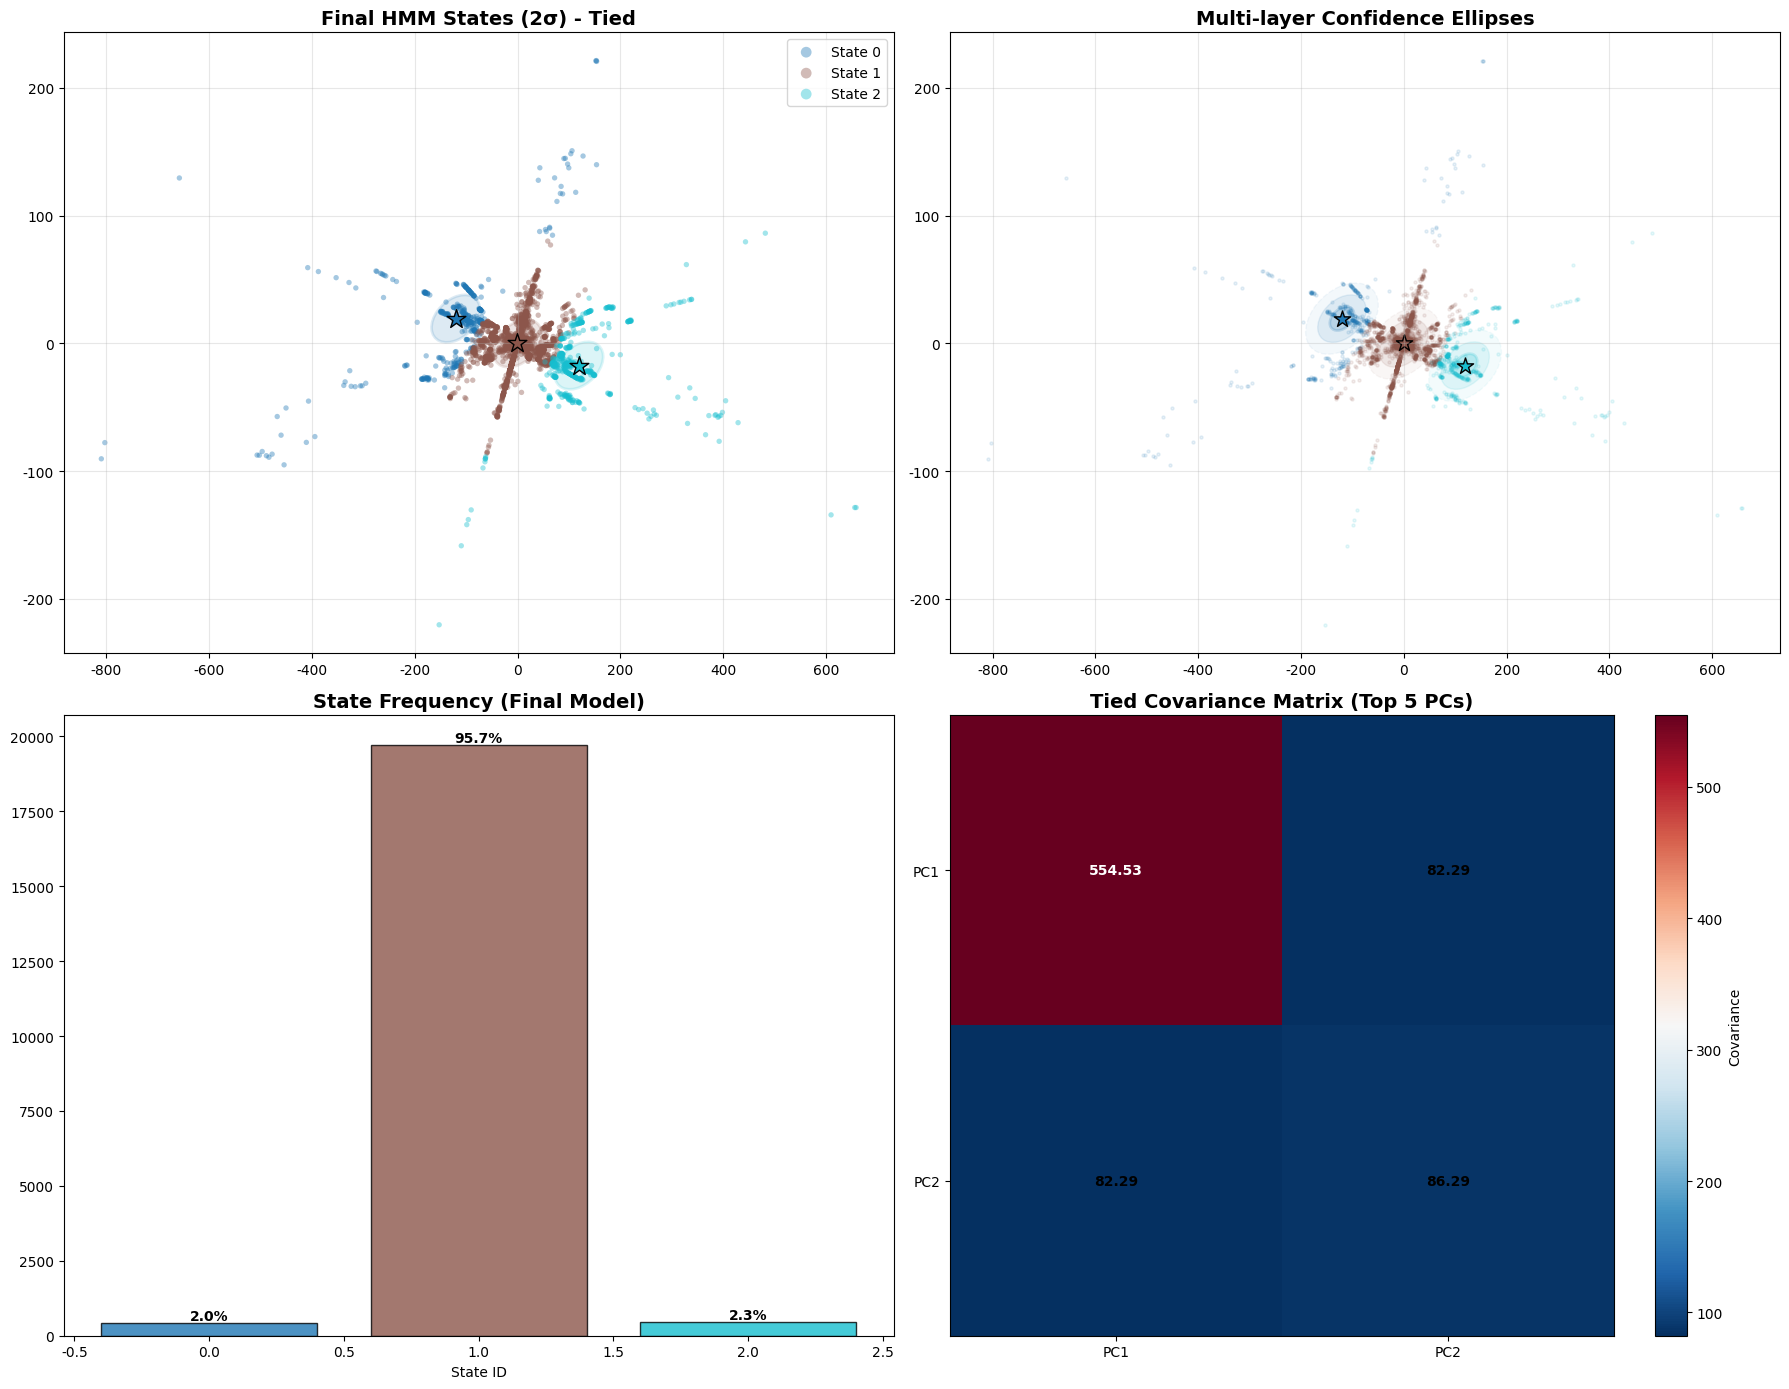

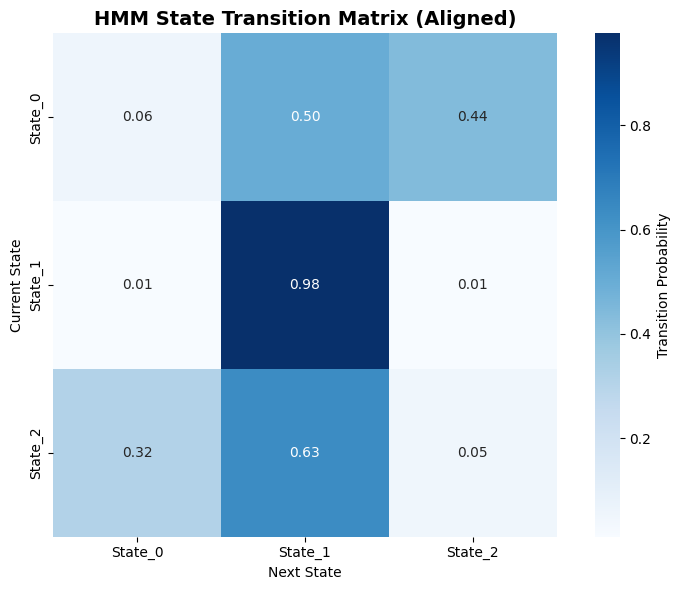

✔ 轉移矩陣已輸出: output_v全域版/hmm_transition_matrix_aligned.csv
✅ 完成！


In [ ]:
# ============================================================
# Cell 8c: 擴充視窗 HMM (Expanding Window + Warm Start)
# ============================================================
# 策略變更：
# 1. 不再預先訓練全域模型。
# 2. 採用 Expanding Window：訓練資料隨著時間推進而不斷累積 (0 -> t)。
# 3. Warm Start：利用上個時刻的模型參數初始化當前模型，穩定狀態定義。
# 4. 輸出：
#    - Rolling State: 模擬當下視角，對未來(下一個Step)的預測。
#    - Final Global State: 訓練結束後，用最終模型回頭標記整段歷史。
# ============================================================

import pandas as pd
import numpy as np
from hmmlearn.hmm import GaussianHMM
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import gc
import polars as pl
from pathlib import Path
from tqdm.auto import tqdm
import copy



def log(msg): print(msg)

log("=" * 60)
log("【步驟 8c】擴充視窗 HMM (Expanding Window + Warm Start)")
log("=" * 60)

# ---------- 2. 讀取資料 ----------
log("\n【1. 讀取資料】")

out_pca_file = OUT / "step3_features_with_pca.parquet"
if not out_pca_file.exists():
    raise FileNotFoundError(f"找不到檔案: {out_pca_file}")

df_pca = pl.read_parquet(out_pca_file)

pca_cols = [c for c in df_pca.columns if c.startswith("PC")]
X_all = df_pca.select(pca_cols).fill_null(0.0).to_numpy().astype(np.float64)

log(f"✔ PCA 特徵：{pca_cols}")
log(f"✔ 樣本數：{len(X_all):,}")

# ---------- 3. 超參設定 ----------
N_STATES = 3
N_ITER_ROLLING = 100
TOL = 1e-4
COVARIANCE_TYPE = "tied"

log(f"✔ 隱狀態數：{N_STATES}")
log(f"✔ 協方差類型：{COVARIANCE_TYPE}")
log(f"✔ 訓練模式：Expanding Window (累積歷史資料)")

# ---------- 4. 滾動參數 ----------
TRADING_HOURS_PER_DAY = 5
MINUTES_PER_DAY = TRADING_HOURS_PER_DAY * 60          # 300
STEP_DAYS = 5
STEP_SIZE = STEP_DAYS * MINUTES_PER_DAY               # 1500
MIN_TRAIN_DAYS = 20
MIN_TRAIN_SIZE = MIN_TRAIN_DAYS * MINUTES_PER_DAY     # 6000

log(f"✔ 初始視窗: {MIN_TRAIN_SIZE} 筆 ({MIN_TRAIN_DAYS} 天)")
log(f"✔ 滾動步長: {STEP_SIZE} 筆 ({STEP_DAYS} 天)")

# ---------- 5. 擴充視窗訓練 ----------
log("\n" + "=" * 60)
log("【2. 開始滾動訓練】")
log("=" * 60)

rolling_states = np.full(len(X_all), -1, dtype=int)
prev_model = None
curr_idx = MIN_TRAIN_SIZE
total_steps = (len(X_all) - MIN_TRAIN_SIZE) // STEP_SIZE + 1

with tqdm(total=total_steps, desc="Expanding Training", unit="step") as pbar:
    while curr_idx < len(X_all):
        # 訓練區
        X_train = X_all[:curr_idx]
        # 預測區
        test_end = min(curr_idx + STEP_SIZE, len(X_all))
        X_test = X_all[curr_idx:test_end]
        if len(X_test) == 0:
            break

        # 建立模型
        curr_hmm = GaussianHMM(
            n_components=N_STATES,
            covariance_type=COVARIANCE_TYPE,
            n_iter=N_ITER_ROLLING,
            tol=TOL,
            random_state=42,
            verbose=0,
            init_params='stmc'
        )

        # Warm start
        if prev_model is not None:
            curr_hmm.init_params = ''
            curr_hmm.startprob_ = prev_model.startprob_.copy()
            curr_hmm.transmat_  = prev_model.transmat_.copy()
            curr_hmm.means_     = prev_model.means_.copy()
            prev_cov = prev_model.covars_
            if COVARIANCE_TYPE == 'tied' and prev_cov.ndim == 3:
                curr_hmm.covars_ = prev_cov[0].copy()
            else:
                curr_hmm.covars_ = prev_cov.copy()

        # 訓練
        try:
            curr_hmm.fit(X_train)
        except Exception as e:
            log(f"⚠ 訓練異常 (Index {curr_idx}): {e}")
            curr_idx += STEP_SIZE
            pbar.update(1)
            continue

        # 預測
        try:
            preds = curr_hmm.predict(X_test)
        except Exception as e:
            log(f"⚠ 預測異常 (Index {curr_idx}): {e}")
            curr_idx += STEP_SIZE
            pbar.update(1)
            continue

        # 狀態對齊 + 模型參數同步搬移
        means_pc1 = curr_hmm.means_[:, 0]
        if np.isnan(means_pc1).any():
            log(f"⚠ Means 含有 NaN，跳過此步 (Index {curr_idx})")
            curr_idx += STEP_SIZE
            pbar.update(1)
            continue
        sorted_indices = np.argsort(means_pc1)

        # 重新排列模型內部參數，使 state 0 永遠對應 PC1 最小
        curr_hmm.means_     = curr_hmm.means_[sorted_indices]
        curr_hmm.startprob_ = curr_hmm.startprob_[sorted_indices]
        curr_hmm.transmat_  = curr_hmm.transmat_[sorted_indices, :][:, sorted_indices]
        if COVARIANCE_TYPE != 'tied':
            curr_hmm.covars_ = curr_hmm.covars_[sorted_indices]

        # 現在 preds 已經是「對齊後」的狀態號，直接寫入
        rolling_states[curr_idx:test_end] = preds

        # 保存本輪模型
        prev_model = copy.deepcopy(curr_hmm)
        del curr_hmm
        curr_idx += STEP_SIZE
        pbar.update(1)

        # 定期 GC
        if curr_idx % (STEP_SIZE * 10) == 0:
            gc.collect()

log(f"✔ 滾動訓練完成")

# ---------- 6. 最終全域狀態 ----------
log("\n【3. 生成最終全域狀態】")
final_model = prev_model
if final_model is None:
    raise RuntimeError("模型訓練失敗，沒有產出任何模型。")

global_states_aligned = final_model.predict(X_all)
log(f"✔ 最終模型 Log-Likelihood: {final_model.score(X_all):.2f}")

# ---------- 7. 視覺化 ----------
log("\n【4. 產生視覺化報告】")


def plot_confidence_ellipse(mean, cov, ax, n_std=2.0, **kwargs):
    if cov.ndim == 3:
        cov = cov[0]
    if cov.shape != (2, 2):
        return
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    width, height = 2 * n_std * np.sqrt(vals)
    ell = Ellipse(xy=mean, width=width, height=height, angle=theta, **kwargs)
    ax.add_patch(ell)


fig, axes = plt.subplots(2, 2, figsize=(18, 14))
colors = plt.cm.tab10(np.linspace(0, 1, N_STATES))

# 準備繪圖資料
df_viz = df_pca.to_pandas().copy()
df_viz["State"] = global_states_aligned

# --- 圖 1: HMM States (2σ) ---
ax = axes[0, 0]
for s in range(N_STATES):
    mask = df_viz["State"] == s
    ax.scatter(df_viz.loc[mask, "PC1"], df_viz.loc[mask, "PC2"],
               c=[colors[s]], label=f"State {s}", s=15, alpha=0.4,
               edgecolors='none', rasterized=True)

# 繪橢圓
cov_base = final_model.covars_
if cov_base.ndim == 3:
    cov_base = cov_base[0]
cov_base = cov_base[:2, :2]
for s in range(N_STATES):
    m = final_model.means_[s, :2]
    plot_confidence_ellipse(m, cov_base, ax, n_std=2.0,
                            facecolor=colors[s], alpha=0.15, edgecolor=colors[s], linewidth=2)
    ax.scatter([m[0]], [m[1]], c=[colors[s]], s=200, marker='*', edgecolors='k', zorder=10)
ax.set_title(f"Final HMM States (2σ) - Tied", fontsize=14, fontweight='bold')
ax.legend(loc='best', markerscale=2)
ax.grid(alpha=0.3)

# --- 圖 2: Multi-layer Confidence ---
ax = axes[0, 1]
for s in range(N_STATES):
    mask = df_viz["State"] == s
    ax.scatter(df_viz.loc[mask, "PC1"], df_viz.loc[mask, "PC2"],
               c=[colors[s]], s=5, alpha=0.1, rasterized=True)
    m = final_model.means_[s, :2]
    plot_confidence_ellipse(m, cov_base, ax, n_std=3.0, facecolor=colors[s], alpha=0.05, edgecolor=colors[s], ls='--')
    plot_confidence_ellipse(m, cov_base, ax, n_std=2.0, facecolor=colors[s], alpha=0.1, edgecolor=colors[s])
    plot_confidence_ellipse(m, cov_base, ax, n_std=1.0, facecolor=colors[s], alpha=0.2, edgecolor=colors[s], lw=2)
    ax.scatter([m[0]], [m[1]], c=[colors[s]], s=150, marker='*', edgecolors='k')
ax.set_title("Multi-layer Confidence Ellipses", fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)

# --- 圖 3: 頻率分佈 ---
ax = axes[1, 0]
counts = df_viz["State"].value_counts().sort_index()
bars = ax.bar(counts.index, counts.values, color=colors, edgecolor='k', alpha=0.8)
for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, h, f'{h / len(df_viz):.1%}',
            ha='center', va='bottom', fontweight='bold')
ax.set_title("State Frequency (Final Model)", fontsize=14, fontweight='bold')
ax.set_xlabel("State ID")

# --- 圖 4: 協方差矩陣 ---
ax = axes[1, 1]
cov_mat = final_model.covars_
if cov_mat.ndim == 3:
    cov_mat = cov_mat[0]
cov_top = cov_mat[:5, :5]
im = ax.imshow(cov_top, cmap='RdBu_r', aspect='auto')
plt.colorbar(im, ax=ax, label="Covariance")
for i in range(cov_top.shape[0]):
    for j in range(cov_top.shape[1]):
        ax.text(j, i, f"{cov_top[i, j]:.2f}", ha="center", va="center",
                color="white" if abs(cov_top[i, j]) > np.max(cov_top) / 2 else "black", fontweight="bold")
ax.set_title("Tied Covariance Matrix (Top 5 PCs)", fontsize=14, fontweight='bold')
ax.set_xticks(range(cov_top.shape[1]))
ax.set_xticklabels([f"PC{i + 1}" for i in range(cov_top.shape[1])])
ax.set_yticks(range(cov_top.shape[0]))
ax.set_yticklabels([f"PC{i + 1}" for i in range(cov_top.shape[0])])

plt.tight_layout()
plt.savefig(OUT / "hmm_tied_expanding.png", dpi=300)
log(f"✔ 圖片已儲存: hmm_tied_expanding.png")
del df_viz, fig, axes
gc.collect()

# ---------- 8. 輸出與存檔 ----------
log("\n【5. 輸出結果與統計】")

df_final = df_pca.with_columns([
    pl.Series("HMM_State_Final", global_states_aligned).cast(pl.Int32),
    pl.Series("HMM_State_Rolling", rolling_states).cast(pl.Int32)
])

out_parquet = OUT / "step4_features_with_hmm.parquet"
df_final.write_parquet(out_parquet)

with open(OUT / "hmm_model_final.pkl", "wb") as f:
    pickle.dump(final_model, f)

# 統計表
target_features = ["Ret_t_scaled", "Buy_pressure_t_scaled", "Emo_score_scaled"]
available_features = [f for f in target_features if f in df_final.columns]
agg_exprs = [pl.len().alias("Count"), pl.col("PC1").mean().alias("PC1_Mean")]
for feat in available_features:
    agg_exprs.extend([
        pl.col(feat).mean().alias(f"{feat}_Mean"),
        pl.col(feat).median().alias(f"{feat}_Median"),
        pl.col(feat).std().alias(f"{feat}_Std")
    ])

stats = df_final.group_by("HMM_State_Final").agg(agg_exprs).sort("HMM_State_Final")
total_count = df_final.height
stats = stats.with_columns((pl.col("Count") / total_count).alias("Ratio"))

final_cols = (["HMM_State_Final", "Count", "Ratio"] +
              [c for c in stats.columns if c != "HMM_State_Final" and c != "Count" and c != "Ratio"])
out_stats_path = OUT / "hmm_state_stats.csv"
stats.select(final_cols).write_csv(out_stats_path, float_precision=4)

log(f"✔ Parquet 輸出: {out_parquet}")
log(f"✔ 統計數據輸出: {out_stats_path}")
print(stats.select(final_cols))

# ---------- 9. 轉移矩陣 ----------
log("\n【6. 計算狀態轉移機率矩陣】")
# 因模型內部已經是 aligned 順序，直接輸出即可
df_trans = pd.DataFrame(
    final_model.transmat_,
    index=[f"State_{i}" for i in range(N_STATES)],
    columns=[f"State_{i}" for i in range(N_STATES)]
)
print("Aligned Transition Matrix:")
print(df_trans.round(4))
out_trans_path = OUT / "hmm_transition_matrix_aligned.csv"
df_trans.to_csv(out_trans_path, float_format="%.6f")

plt.figure(figsize=(8, 6))
sns.heatmap(df_trans, annot=True, fmt=".2f", cmap="Blues", square=True,
            cbar_kws={"label": "Transition Probability"})
plt.title("HMM State Transition Matrix (Aligned)", fontsize=14, fontweight="bold")
plt.xlabel("Next State")
plt.ylabel("Current State")
plt.tight_layout()
plt.savefig(OUT / "hmm_transition_matrix_aligned.png", dpi=300)
plt.show()

log(f"✔ 轉移矩陣已輸出: {out_trans_path}")
log(f"✅ 完成！")

In [ ]:
# ============================================================
# New Cell: 長路徑狀態序列分析 (Long Path Sequence Analysis)
# ============================================================
import pandas as pd
import numpy as np
import polars as pl

log("\n" + "=" * 60)
log("【額外統計】長路徑狀態序列分析 (循環與演化)")
log("=" * 60)

# 1. 取得狀態序列 (對齊後: 0=低PC1, 1=中PC1, 2=高PC1)
# 這裡根據您的描述：1->0, 2->1, 3->2 進行轉換
seq = global_states_aligned.tolist()

def count_complex_path(sequence, path_nodes):
    """
    計算特定長路徑在序列中出現的次數
    path_nodes: list, 例如 [0, 1, 2, 1, 0]
    """
    count = 0
    p_len = len(path_nodes)
    for i in range(len(sequence) - p_len + 1):
        if sequence[i : i + p_len] == path_nodes:
            count += 1
    return count

# 2. 定義您想觀察的各種長路徑
# 映射關係：使用者標記 1,2,3 -> 模型狀態 0,1,2
target_long_paths = {
    "1-2-3-2-1 (完全循環)": [0, 1, 2, 1, 0],
    "3-2-1-2-3 (反向循環)": [2, 1, 0, 1, 2],
    "1-2-3-2 (噴發後回調)": [0, 1, 2, 1],
    "3-2-1-2 (殺盤後反彈)": [2, 1, 0, 1],
    "1-2-1-2 (中軌震盪)": [0, 1, 0, 1],
}

log(f"分析序列總長度: {len(seq):,}")

results = []
for label, nodes in target_long_paths.items():
    cnt = count_complex_path(seq, nodes)
    results.append({
        "路徑描述": label,
        "狀態編碼": str(nodes),
        "出現次數": cnt,
        "發生機率": f"{(cnt / len(seq)):.5%}"
    })

# 3. 輸出結果表
df_long_path = pd.DataFrame(results)
print("\n【長路徑出現次數統計】")
print(df_long_path.to_string(index=False))

# 4. 找出這些路徑發生的具體索引 (Index)
# 這裡以第一個路徑為例，如果您需要視覺化，這些索引很有用
example_path = [0, 1, 2, 1, 0]
example_indices = [i for i in range(len(seq)-len(example_path)+1) if seq[i:i+len(example_path)] == example_path]

log(f"\n✔ 範例路徑 {example_path} 總共發生在以下索引點 (前 5 筆):")
log(f"{example_indices[:5]}")

# 儲存統計
df_long_path.to_csv(OUT / "hmm_long_path_stats.csv", index=False)
log(f"\n✔ 統計結果已儲存至: {OUT / 'hmm_long_path_stats.csv'}")


【額外統計】長路徑狀態序列分析 (循環與演化)
分析序列總長度: 20,606

【長路徑出現次數統計】
            路徑描述            狀態編碼  出現次數     發生機率
1-2-3-2-1 (完全循環) [0, 1, 2, 1, 0]    11 0.05338%
3-2-1-2-3 (反向循環) [2, 1, 0, 1, 2]    18 0.08735%
 1-2-3-2 (噴發後回調)    [0, 1, 2, 1]    31 0.15044%
 3-2-1-2 (殺盤後反彈)    [2, 1, 0, 1]    47 0.22809%
  1-2-1-2 (中軌震盪)    [0, 1, 0, 1]     0 0.00000%

✔ 範例路徑 [0, 1, 2, 1, 0] 總共發生在以下索引點 (前 5 筆):
[1829, 2345, 2364, 2559, 2596]

✔ 統計結果已儲存至: output_v全域版/hmm_long_path_stats.csv


【步驟 8c】擴充視窗 HMM (Expanding Window + Warm Start) - Cov: FULL

【1. 讀取資料】
✔ PCA 特徵：['PC1', 'PC2']
✔ 樣本數：20,606
✔ 隱狀態數：3
✔ 協方差類型：full
✔ 訓練模式：Expanding Window (累積歷史資料)
✔ 初始視窗: 6000 筆 (20 天)
✔ 滾動步長: 1500 筆 (5 天)

【2. 開始滾動訓練】


Expanding Training:   0%|          | 0/10 [00:00<?, ?step/s]

✔ 滾動訓練完成

【3. 生成最終全域狀態】
✔ 最終模型 Log-Likelihood: -75163.68

【4. 產生視覺化報告】


✔ 圖片已儲存: hmm_full_expanding.png

【5. 輸出結果與統計】
✔ Parquet 輸出: output_v全域版/step4_features_with_hmm.parquet
shape: (3, 10)
┌────────────┬───────┬───────────┬────────────┬───┬────────────┬────────────┬───────────┬──────────┐
│ HMM_State_ ┆ Count ┆ PC1_Mean  ┆ Ret_t_scal ┆ … ┆ Buy_pressu ┆ Emo_score_ ┆ Emo_score ┆ Ratio    │
│ Final      ┆ ---   ┆ ---       ┆ ed_Mean    ┆   ┆ re_t_scale ┆ scaled_Mea ┆ _scaled_S ┆ ---      │
│ ---        ┆ u32   ┆ f64       ┆ ---        ┆   ┆ d_Std      ┆ n          ┆ td        ┆ f64      │
│ i32        ┆       ┆           ┆ f64        ┆   ┆ ---        ┆ ---        ┆ ---       ┆          │
│            ┆       ┆           ┆            ┆   ┆ f64        ┆ f64        ┆ f64       ┆          │
╞════════════╪═══════╪═══════════╪════════════╪═══╪════════════╪════════════╪═══════════╪══════════╡
│ 0          ┆ 6623  ┆ -0.137984 ┆ 0.018276   ┆ … ┆ 0.632685   ┆ 0.019481   ┆ 2.782007  ┆ 0.321411 │
│ 1          ┆ 10689 ┆ -0.133366 ┆ 0.006774   ┆ … ┆ 0.659928   ┆ 0.028153

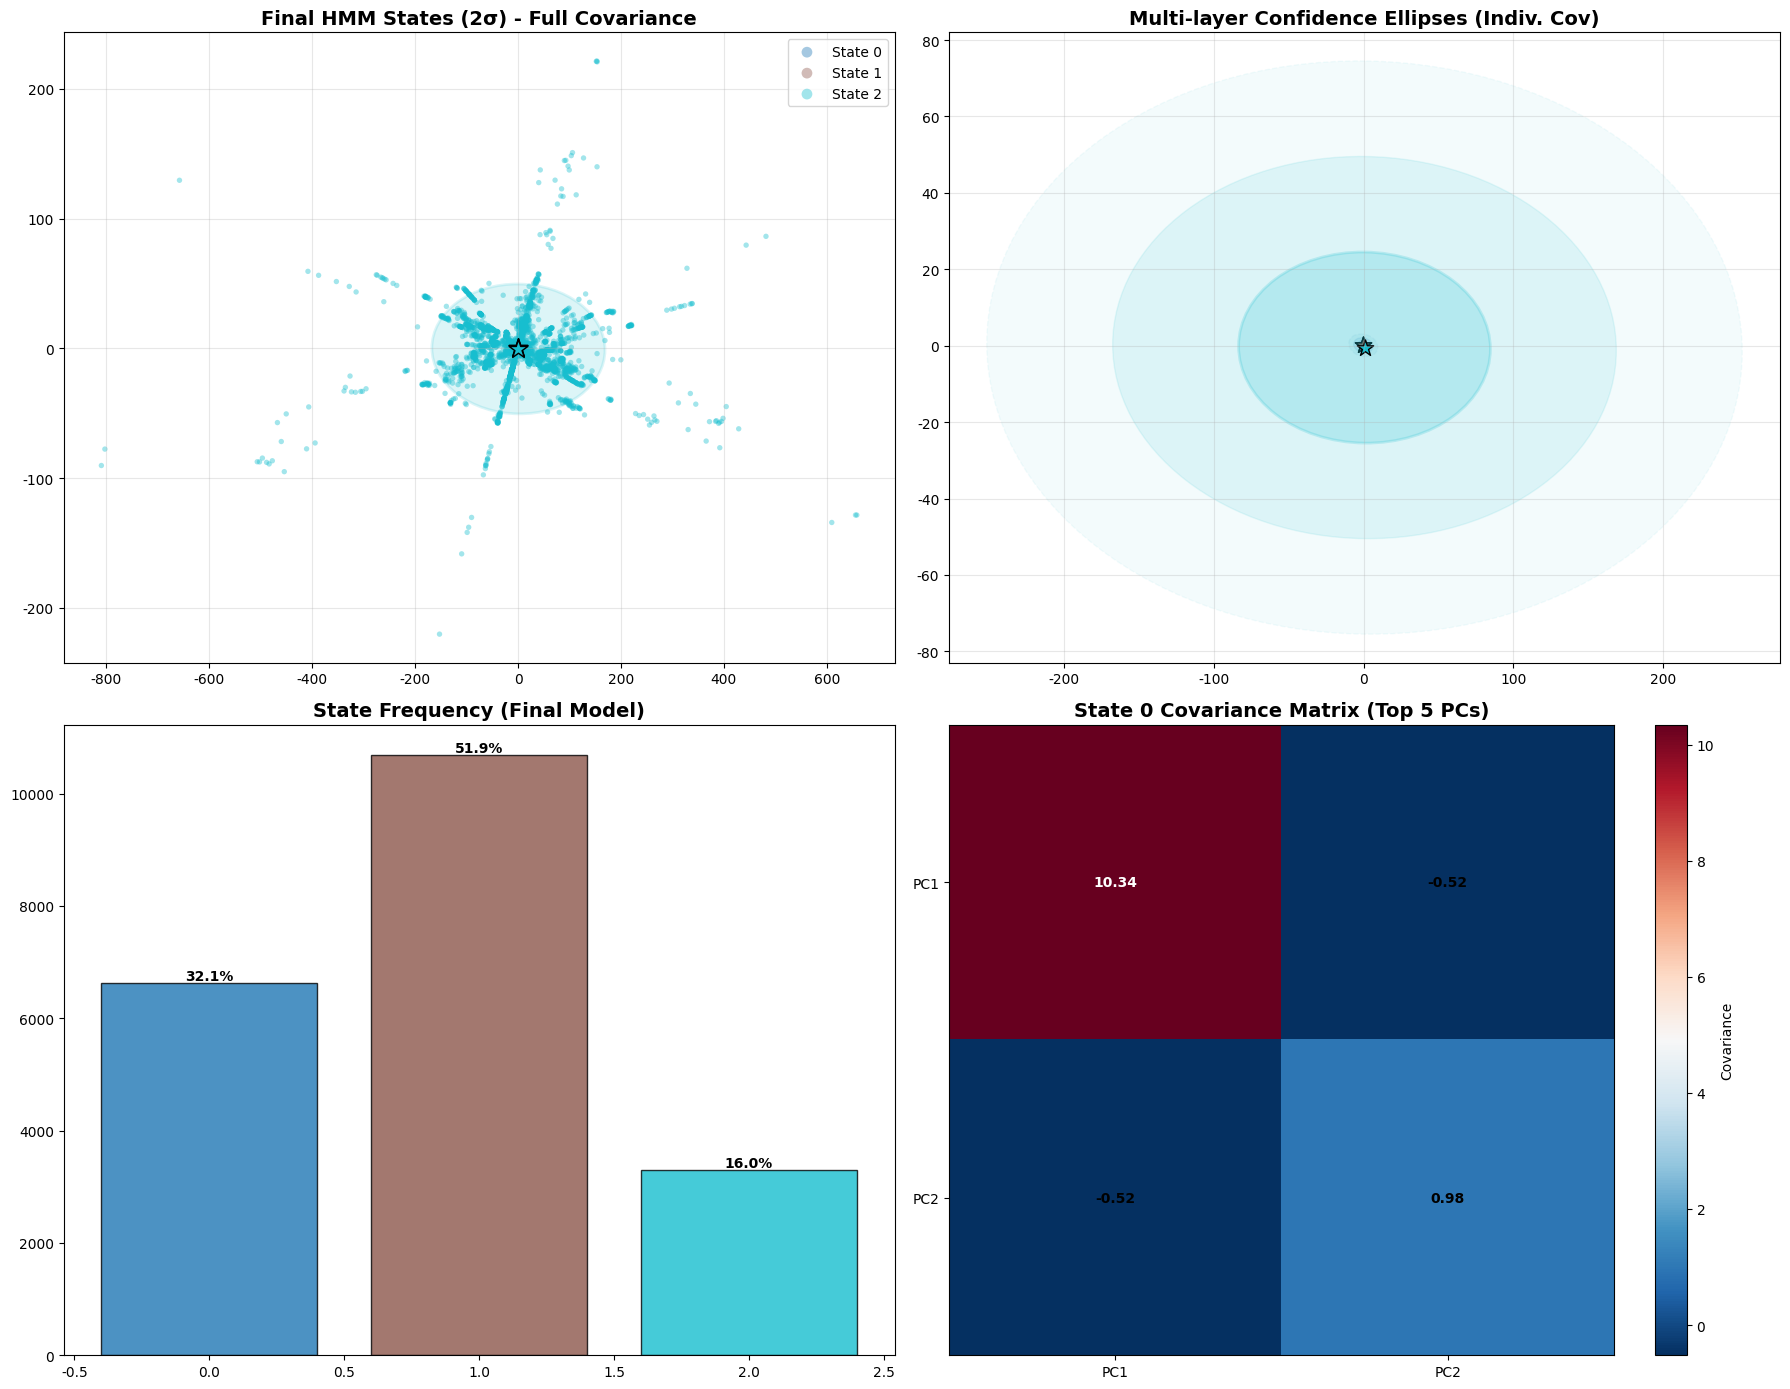

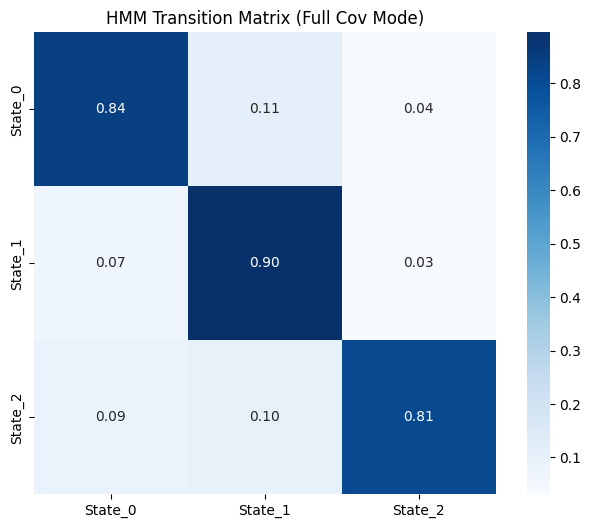

✅ 完成！


In [ ]:
# @title
# ============================================================
# Cell 8c: 擴充視窗 HMM (Expanding Window + Warm Start) - Full Covariance
# ============================================================

import pandas as pd
import numpy as np
from hmmlearn.hmm import GaussianHMM
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import gc
import polars as pl
from pathlib import Path
from tqdm.auto import tqdm
import copy

def log(msg): print(msg)

log("=" * 60)
log("【步驟 8c】擴充視窗 HMM (Expanding Window + Warm Start) - Cov: FULL")
log("=" * 60)

# ---------- 2. 讀取資料 ----------
log("\n【1. 讀取資料】")

# 假設 OUT 變數已在外部定義，若無請取消註釋下方行
# OUT = Path("./output")
out_pca_file = OUT / "step3_features_with_pca.parquet"
if not out_pca_file.exists():
    raise FileNotFoundError(f"找不到檔案: {out_pca_file}")

df_pca = pl.read_parquet(out_pca_file)

pca_cols = [c for c in df_pca.columns if c.startswith("PC")]
X_all = df_pca.select(pca_cols).fill_null(0.0).to_numpy().astype(np.float64)

log(f"✔ PCA 特徵：{pca_cols}")
log(f"✔ 樣本數：{len(X_all):,}")

# ---------- 3. 超參設定 ----------
N_STATES = 3
N_ITER_ROLLING = 100
TOL = 1e-4
COVARIANCE_TYPE = "full"  # 修改為 full

log(f"✔ 隱狀態數：{N_STATES}")
log(f"✔ 協方差類型：{COVARIANCE_TYPE}")
log(f"✔ 訓練模式：Expanding Window (累積歷史資料)")

# ---------- 4. 滾動參數 ----------
TRADING_HOURS_PER_DAY = 5
MINUTES_PER_DAY = TRADING_HOURS_PER_DAY * 60          # 300
STEP_DAYS = 5
STEP_SIZE = STEP_DAYS * MINUTES_PER_DAY               # 1500
MIN_TRAIN_DAYS = 20
MIN_TRAIN_SIZE = MIN_TRAIN_DAYS * MINUTES_PER_DAY     # 6000

log(f"✔ 初始視窗: {MIN_TRAIN_SIZE} 筆 ({MIN_TRAIN_DAYS} 天)")
log(f"✔ 滾動步長: {STEP_SIZE} 筆 ({STEP_DAYS} 天)")

# ---------- 5. 擴充視窗訓練 ----------
log("\n" + "=" * 60)
log("【2. 開始滾動訓練】")
log("=" * 60)

rolling_states = np.full(len(X_all), -1, dtype=int)
prev_model = None
curr_idx = MIN_TRAIN_SIZE
total_steps = (len(X_all) - MIN_TRAIN_SIZE) // STEP_SIZE + 1

with tqdm(total=total_steps, desc="Expanding Training", unit="step") as pbar:
    while curr_idx < len(X_all):
        X_train = X_all[:curr_idx]
        test_end = min(curr_idx + STEP_SIZE, len(X_all))
        X_test = X_all[curr_idx:test_end]

        if len(X_test) == 0:
            break

        curr_hmm = GaussianHMM(
            n_components=N_STATES,
            covariance_type=COVARIANCE_TYPE,
            n_iter=N_ITER_ROLLING,
            tol=TOL,
            random_state=42,
            verbose=0,
            init_params='stmc'
        )

        # Warm start 邏輯
        if prev_model is not None:
            curr_hmm.init_params = ''
            curr_hmm.startprob_ = prev_model.startprob_.copy()
            curr_hmm.transmat_  = prev_model.transmat_.copy()
            curr_hmm.means_     = prev_model.means_.copy()
            curr_hmm.covars_    = prev_model.covars_.copy()

        try:
            curr_hmm.fit(X_train)
        except Exception as e:
            log(f"⚠ 訓練異常 (Index {curr_idx}): {e}")
            curr_idx += STEP_SIZE
            pbar.update(1)
            continue

        try:
            preds = curr_hmm.predict(X_test)
        except Exception as e:
            log(f"⚠ 預測異常 (Index {curr_idx}): {e}")
            curr_idx += STEP_SIZE
            pbar.update(1)
            continue

        # 狀態對齊：基於 PC1 的均值排序
        means_pc1 = curr_hmm.means_[:, 0]
        if np.isnan(means_pc1).any():
            log(f"⚠ Means 含有 NaN，跳過此步 (Index {curr_idx})")
            curr_idx += STEP_SIZE
            pbar.update(1)
            continue

        sorted_indices = np.argsort(means_pc1)

        # 重新排列所有模型參數
        curr_hmm.means_     = curr_hmm.means_[sorted_indices]
        curr_hmm.startprob_ = curr_hmm.startprob_[sorted_indices]
        curr_hmm.transmat_  = curr_hmm.transmat_[sorted_indices, :][:, sorted_indices]
        # Full covariance 每個狀態都有獨立矩陣，需一起重排
        curr_hmm.covars_    = curr_hmm.covars_[sorted_indices]

        # 寫入預測結果 (此時 predict 的 index 與對齊後的狀態是一致的，因為 predict 是在 fit 後執行的，
        # 實務上更嚴謹做法是對 preds 做 map，但在這裡我們直接在存入 prev_model 前對齊模型)
        # 由於我們已經在 model 層級對齊，下次滾動 predict 就會是正確的順序
        rolling_states[curr_idx:test_end] = curr_hmm.predict(X_test)

        prev_model = copy.deepcopy(curr_hmm)
        curr_idx += STEP_SIZE
        pbar.update(1)

        if curr_idx % (STEP_SIZE * 10) == 0:
            gc.collect()

log(f"✔ 滾動訓練完成")

# ---------- 6. 最終全域狀態 ----------
log("\n【3. 生成最終全域狀態】")
final_model = prev_model
if final_model is None:
    raise RuntimeError("模型訓練失敗，沒有產出任何模型。")

global_states_aligned = final_model.predict(X_all)
log(f"✔ 最終模型 Log-Likelihood: {final_model.score(X_all):.2f}")

# ---------- 7. 視覺化 ----------
log("\n【4. 產生視覺化報告】")

def plot_confidence_ellipse(mean, cov, ax, n_std=2.0, **kwargs):
    """繪製二維正態分佈的信心橢圓"""
    if cov.shape != (2, 2):
        return
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    width, height = 2 * n_std * np.sqrt(np.maximum(vals, 1e-10))
    ell = Ellipse(xy=mean, width=width, height=height, angle=theta, **kwargs)
    ax.add_patch(ell)

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
colors = plt.cm.tab10(np.linspace(0, 1, N_STATES))
df_viz = df_pca.to_pandas().copy()
df_viz["State"] = global_states_aligned

# --- 圖 1: HMM States (2σ) ---
ax = axes[0, 0]
for s in range(N_STATES):
    mask = df_viz["State"] == s
    ax.scatter(df_viz.loc[mask, "PC1"], df_viz.loc[mask, "PC2"],
               c=[colors[s]], label=f"State {s}", s=15, alpha=0.4,
               edgecolors='none', rasterized=True)

    # 為每個狀態使用對應的 covars_
    m = final_model.means_[s, :2]
    c = final_model.covars_[s, :2, :2]
    plot_confidence_ellipse(m, c, ax, n_std=2.0,
                            facecolor=colors[s], alpha=0.15, edgecolor=colors[s], linewidth=2)
    ax.scatter([m[0]], [m[1]], c=[colors[s]], s=200, marker='*', edgecolors='k', zorder=10)

ax.set_title(f"Final HMM States (2σ) - Full Covariance", fontsize=14, fontweight='bold')
ax.legend(loc='best', markerscale=2)
ax.grid(alpha=0.3)

# --- 圖 2: Multi-layer Confidence ---
ax = axes[0, 1]
for s in range(N_STATES):
    m = final_model.means_[s, :2]
    c = final_model.covars_[s, :2, :2]
    plot_confidence_ellipse(m, c, ax, n_std=3.0, facecolor=colors[s], alpha=0.05, edgecolor=colors[s], ls='--')
    plot_confidence_ellipse(m, c, ax, n_std=2.0, facecolor=colors[s], alpha=0.1, edgecolor=colors[s])
    plot_confidence_ellipse(m, c, ax, n_std=1.0, facecolor=colors[s], alpha=0.2, edgecolor=colors[s], lw=2)
    ax.scatter([m[0]], [m[1]], c=[colors[s]], s=150, marker='*', edgecolors='k')

ax.set_title("Multi-layer Confidence Ellipses (Indiv. Cov)", fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)

# --- 圖 3: 頻率分佈 ---
ax = axes[1, 0]
counts = df_viz["State"].value_counts().sort_index()
bars = ax.bar(counts.index, counts.values, color=colors, edgecolor='k', alpha=0.8)
for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, h, f'{h / len(df_viz):.1%}',
            ha='center', va='bottom', fontweight='bold')
ax.set_title("State Frequency (Final Model)", fontsize=14, fontweight='bold')

# --- 圖 4: 狀態 0 的協方差矩陣 (作為代表) ---
ax = axes[1, 1]
# 顯示 State 0 的前 5x5 協方差
cov_top = final_model.covars_[0, :5, :5]
im = ax.imshow(cov_top, cmap='RdBu_r', aspect='auto')
plt.colorbar(im, ax=ax, label="Covariance")
for i in range(cov_top.shape[0]):
    for j in range(cov_top.shape[1]):
        ax.text(j, i, f"{cov_top[i, j]:.2f}", ha="center", va="center",
                color="white" if abs(cov_top[i, j]) > np.max(np.abs(cov_top)) / 2 else "black", fontweight="bold")
ax.set_title("State 0 Covariance Matrix (Top 5 PCs)", fontsize=14, fontweight='bold')
ax.set_xticks(range(cov_top.shape[1]))
ax.set_xticklabels([f"PC{i + 1}" for i in range(cov_top.shape[1])])
ax.set_yticks(range(cov_top.shape[0]))
ax.set_yticklabels([f"PC{i + 1}" for i in range(cov_top.shape[0])])

plt.tight_layout()
plt.savefig(OUT / "hmm_full_expanding.png", dpi=300)
log(f"✔ 圖片已儲存: hmm_full_expanding.png")

# ---------- 8. 輸出與存檔 ----------
log("\n【5. 輸出結果與統計】")

df_final = df_pca.with_columns([
    pl.Series("HMM_State_Final", global_states_aligned).cast(pl.Int32),
    pl.Series("HMM_State_Rolling", rolling_states).cast(pl.Int32)
])

out_parquet = OUT / "step4_features_with_hmm.parquet"
df_final.write_parquet(out_parquet)

with open(OUT / "hmm_model_final.pkl", "wb") as f:
    pickle.dump(final_model, f)

# 統計
agg_exprs = [pl.len().alias("Count"), pl.col("PC1").mean().alias("PC1_Mean")]
target_features = ["Ret_t_scaled", "Buy_pressure_t_scaled", "Emo_score_scaled"]
available_features = [f for f in target_features if f in df_final.columns]
for feat in available_features:
    agg_exprs.extend([pl.col(feat).mean().alias(f"{feat}_Mean"), pl.col(feat).std().alias(f"{feat}_Std")])

stats = df_final.group_by("HMM_State_Final").agg(agg_exprs).sort("HMM_State_Final")
stats = stats.with_columns((pl.col("Count") / df_final.height).alias("Ratio"))
stats.write_csv(OUT / "hmm_state_stats.csv")

log(f"✔ Parquet 輸出: {out_parquet}")
print(stats)

# ---------- 9. 轉移矩陣 ----------
log("\n【6. 計算狀態轉移機率矩陣】")
df_trans = pd.DataFrame(
    final_model.transmat_,
    index=[f"State_{i}" for i in range(N_STATES)],
    columns=[f"State_{i}" for i in range(N_STATES)]
)
plt.figure(figsize=(8, 6))
sns.heatmap(df_trans, annot=True, fmt=".2f", cmap="Blues", square=True)
plt.title("HMM Transition Matrix (Full Cov Mode)")
plt.savefig(OUT / "hmm_transition_matrix_full.png", dpi=300)
plt.show()

log(f"✅ 完成！")

## 資料互動觀察

【步驟 9】Viterbi 解碼 & 互動式檢視器
1. 讀取檔案: step4_features_with_hmm.parquet
2. 載入模型: hmm_model_final.pkl
⏳ 正在計算全量 Viterbi 路徑...
✔ Viterbi 解碼完成
📅 資料總天數: 83 天
📅 日期範圍: 2025-09-05 ~ 2026-01-21


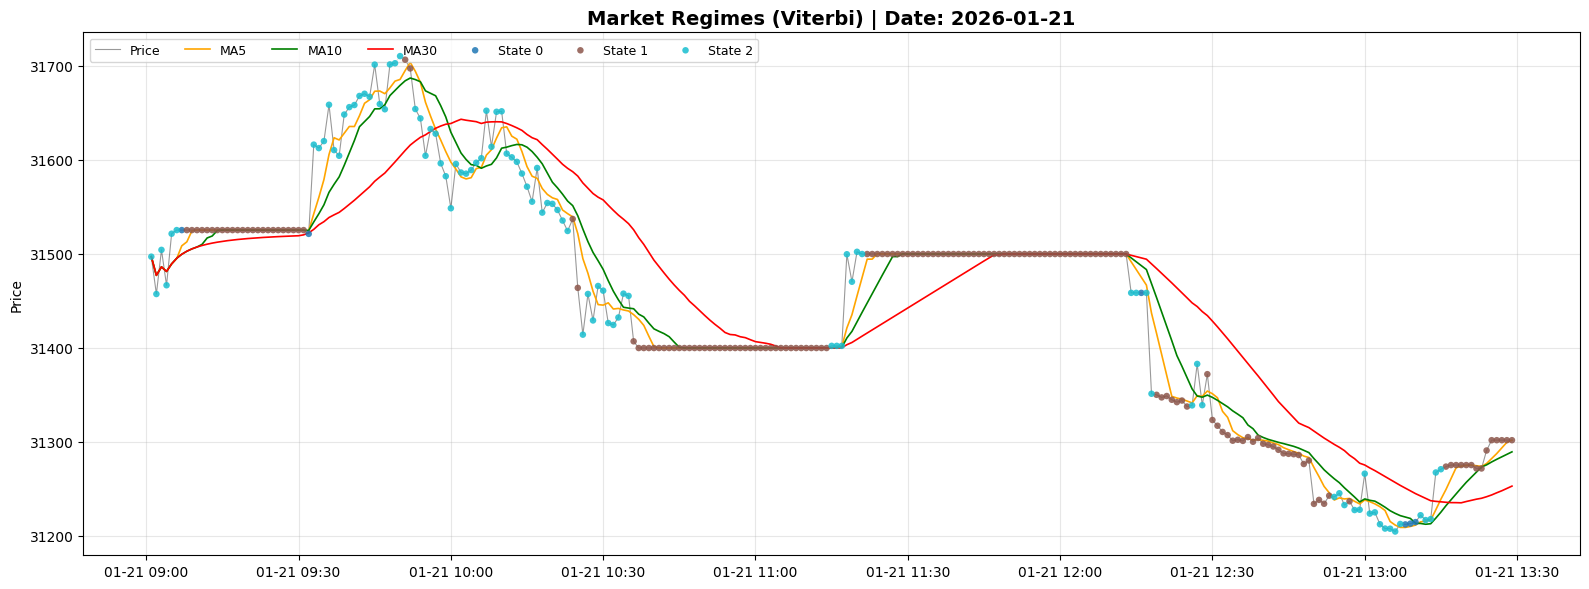


⬇⬇⬇ 請使用下方控制項切換日期 ⬇⬇⬇


In [ ]:
# ============================================================
# Cell 9: Viterbi 解碼與互動式體制視覺化 (Interactive)
# ============================================================
# 優化項目：
# 1. 保留 Viterbi 全域解碼邏輯。
# 2. 建立日期索引清單。
# 3. 引入 ipywidgets：提供 [上一日] [下一日] 按鈕與下拉選單。
# ============================================================

import matplotlib.dates as mdates
import polars as pl
import pandas as pd
import numpy as np
import pickle
import gc
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from pathlib import Path
import ipywidgets as widgets
from IPython.display import display, clear_output

# 設定路徑 (假設上層已定義 OUT)
# OUT = Path("./output")

def log(msg): print(msg)

log("=" * 60)
log("【步驟 9】Viterbi 解碼 & 互動式檢視器")
log("=" * 60)

# ===============================================================
# ⚙️ 互動控制與全域狀態
# ===============================================================
VIEW_MODE = "day"
current_idx = 0


# =========== 1. 讀取資料 ===========
hmm_file = OUT / "step4_features_with_hmm.parquet"
if not hmm_file.exists():
    raise FileNotFoundError(f"❌ 找不到檔案: {hmm_file}")

log(f"1. 讀取檔案: {hmm_file.name}")
df_step4 = pl.read_parquet(hmm_file)

# 欄位映射
COL_TIME = "SnapshotTime"
COL_PRICE = "Price"
COL_DATE_GROUP = "date_group"
COL_PCS = ["PC1", "PC2"]

# 準備全量數據 (Viterbi 需要完整的序列)
X_all = df_step4.select(COL_PCS).fill_null(0.0).to_numpy()

# =========== 2. Viterbi 解碼 (只跑一次) ===========
model_path = OUT / "hmm_model_global.pkl"
if not model_path.exists():
    model_path = OUT / "hmm_model_tied.pkl" # Fallback

if not model_path.exists():
     # 如果都沒有，嘗試讀取 final
    model_path = OUT / "hmm_model_final.pkl"

if not model_path.exists():
     raise FileNotFoundError("❌ 找不到 HMM 模型檔案 (.pkl)")

log(f"2. 載入模型: {model_path.name}")
with open(model_path, "rb") as f:
    global_hmm = pickle.load(f)

N_STATES = global_hmm.n_components

# 判斷是否需要重新計算 Viterbi (如果欄位已存在且不想重算可跳過，這裡預設重算以確保一致)
log(f"⏳ 正在計算全量 Viterbi 路徑...")
log_prob, viterbi_states = global_hmm.decode(X_all, algorithm="viterbi")

# 狀態對齊 (Alignment)
means_pc1 = global_hmm.means_[:, 0]
sort_idx = np.argsort(means_pc1)
state_map = {old: new for new, old in enumerate(sort_idx)}
viterbi_aligned = np.array([state_map[s] for s in viterbi_states])

# 更新 DataFrame
df_final = df_step4.with_columns(
    pl.Series("HMM_State_Viterbi", viterbi_aligned).cast(pl.Int32)
)
# 存檔 (選擇性)
# df_final.write_parquet(hmm_file)
log(f"✔ Viterbi 解碼完成")

# =========== 3. 準備互動所需的資料 ===========

# 取得所有唯一的日期，並排序
all_dates = sorted(df_final[COL_DATE_GROUP].unique().to_list())
log(f"📅 資料總天數: {len(all_dates)} 天")
log(f"📅 日期範圍: {all_dates[0]} ~ {all_dates[-1]}")

# 預先定義顏色 (固定顏色避免跳動)
colors = plt.cm.tab10(np.linspace(0, 1, N_STATES))

# =========== 4. 定義繪圖函數 ===========
def plot_regime_by_date(date_idx):
    global VIEW_MODE

    if date_idx < 0 or date_idx >= len(all_dates):
        print("Index out of bounds.")
        return

    # === 決定要畫哪些日期 ===
    if VIEW_MODE == "day":
        date_list = [all_dates[date_idx]]
        title_suffix = f"Date: {all_dates[date_idx]}"
    else:
        start_idx = max(0, date_idx - 4)
        date_list = all_dates[start_idx:date_idx + 1]
        title_suffix = f"Week View: {date_list[0]} → {date_list[-1]}"

    # === 篩選資料（多日）===
    df_plot = df_final.filter(pl.col(COL_DATE_GROUP).is_in(date_list))
    if len(df_plot) == 0:
        print("No data.")
        return

    # === Pandas ===
    df_pd = df_plot.select(
        [COL_TIME, COL_PRICE, "HMM_State_Viterbi", COL_DATE_GROUP]
    ).to_pandas()

    df_pd[COL_TIME] = pd.to_datetime(df_pd[COL_TIME])
    df_pd = df_pd.sort_values(COL_TIME)

    # === MA（跨日 rolling，這是週視角的重點）===
    df_pd["MA5"]  = df_pd[COL_PRICE].rolling(5,  min_periods=1).mean()
    df_pd["MA10"] = df_pd[COL_PRICE].rolling(10, min_periods=1).mean()
    df_pd["MA30"] = df_pd[COL_PRICE].rolling(30, min_periods=1).mean()

    # === 繪圖 ===
    plt.close('all')
    fig, ax = plt.subplots(figsize=(16, 6))

    # 價格
    ax.plot(df_pd[COL_TIME], df_pd[COL_PRICE],
            color='black', lw=0.8, alpha=0.4, label="Price")

    # MA
    ax.plot(df_pd[COL_TIME], df_pd["MA5"],  color='orange', lw=1.2, label="MA5")
    ax.plot(df_pd[COL_TIME], df_pd["MA10"], color='green',  lw=1.2, label="MA10")
    ax.plot(df_pd[COL_TIME], df_pd["MA30"], color='red',    lw=1.2, label="MA30")

    # 狀態點
    for s in range(N_STATES):
        mask = df_pd["HMM_State_Viterbi"] == s
        if mask.any():
            ax.scatter(
                df_pd.loc[mask, COL_TIME],
                df_pd.loc[mask, COL_PRICE],
                s=22,
                color=colors[s],
                alpha=0.85,
                label=f"State {s}",
                zorder=10,
                edgecolors='none'
            )

    ax.set_title(
        f"Market Regimes (Viterbi) | {title_suffix}",
        fontsize=14, fontweight='bold'
    )
    ax.set_ylabel("Price")
    ax.grid(True, alpha=0.3)
    ax.legend(
        loc='upper left',
        fontsize=9,
        ncol=min(N_STATES + 4, 7)
    )
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
    plt.tight_layout()
    plt.show()



# =========== 5. 建立互動控制項 (ipywidgets) ===========

# 初始化索引 (預設最後一天)
current_idx = len(all_dates) - 1

# 建立元件
btn_prev = widgets.Button(description='◀ Previous Day', icon='arrow-left')
btn_next = widgets.Button(description='Next Day ▶', icon='arrow-right')
dropdown = widgets.Dropdown(
    options=[(date, i) for i, date in enumerate(all_dates)],
    value=current_idx,
    description='Select Date:',
)
out_plot = widgets.Output()

# 按鈕事件處理
def on_btn_click(b):
    global current_idx
    if b.description == '◀ Previous Day':
        current_idx = max(0, current_idx - 1)
    elif b.description == 'Next Day ▶':
        current_idx = min(len(all_dates) - 1, current_idx + 1)

    # 更新下拉選單的值 (會觸發 dropdown 的 observe)
    dropdown.value = current_idx

# 下拉選單事件處理
def on_dropdown_change(change):
    global current_idx
    if change['type'] == 'change' and change['name'] == 'value':
        current_idx = change['new']
        with out_plot:
            clear_output(wait=True)
            plot_regime_by_date(current_idx)

# 綁定事件
btn_prev.on_click(on_btn_click)
btn_next.on_click(on_btn_click)
dropdown.observe(on_dropdown_change)

# 初始顯示
with out_plot:
    plot_regime_by_date(current_idx)

# 顯示介面
log("\n⬇⬇⬇ 請使用下方控制項切換日期 ⬇⬇⬇")
ui = widgets.VBox([
    widgets.HBox([btn_prev, dropdown, btn_next]),
    out_plot
])
display(ui)

## 狀態循環